# **Google Data Analytics Capstone project**
**Analysis of Cyclistic's Customers**

### Project Overview

Cyclistic, a bike-share company in Chicago, offers a bike-share program that features a fleet of 5,824 bicycles geo-tracked and locked into a network of 692 stations across Chicago. Customers who purchase single-ride or full-day passes are casual riders, and those who purchase annual memberships are Annual members. Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders.

The Director of marketing is responsible for the development of campaigns and initiatives to promote the bike-share program, which may include email, social media, and other channels, and has set a clear goal to design marketing strategies aimed at converting casual riders into annual members.

I solved this case study using the Google Data Analytics roadmap in six phases **(ASK, PREPARE, PROCESS, ANALYZE, SHARE, ACT)**

# ASK PHASE

## Business Task: 

The Director of marketing needs to understand **how annual members and casual riders are different** for the marketing team to design marketing strategies aimed at converting casual riders into annual members for Cyclistic's future success.

# PREPARE PHASE

Cyclistic historical trip data is located as an open-data source from [this site](https://divvy-tripdata.s3.amazonaws.com/index.html). The data is organized as compressed files. After downloading historical 12 months (March 2022 to February 2023) of data, I extracted the CSV files which I interpreted as ride records in each row showing unique ride IDs, type of bike used, date and time ride started and ended, station names and id, geometric location of the station, and the type of rider.

The datasets (202203-divvy-tripdata.zip to 202302-divvy-tripdata.zip) were downloaded as csv files and saved in a folder named raw_data. After opening the compressed folders, I renamed 202209-divvy-publictripdata.csv file to 202209-divvy-tripdata.csv to maintain consistent file naming convention. I examined each data file and loaded them back this python notebook for further exploration and analysis.

To address licensing, privacy, and security concerns, riders' personally identifiable information was not included in the datasets. A major problem I identified with the dataset is **poor data collection evidenced by the high number of missing values.** after opening the files.

In [1]:
import zipfile
import os

raw_data = 'cyclitics_raw_data'
zipped_files = [file for file in os.listdir(raw_data) if file.endswith('.zip')]

folder = 'raw_data'

for zip_file in zipped_files:
    zip_file_path = os.path.join(raw_data, zip_file)
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(folder)

extracted_files = os.listdir(folder)
print(extracted_files)

['202203-divvy-tripdata.csv', '202204-divvy-tripdata.csv', '202205-divvy-tripdata.csv', '202206-divvy-tripdata.csv', '202207-divvy-tripdata.csv', '202208-divvy-tripdata.csv', '202209-divvy-publictripdata.csv', '202209-divvy-tripdata.csv', '202210-divvy-tripdata.csv', '202211-divvy-tripdata.csv', '202212-divvy-tripdata.csv', '202301-divvy-tripdata.csv', '202302-divvy-tripdata.csv', '__MACOSX']


In [1]:
# Import packages and libraries
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
# I renamed '202209-divvy-publictripdata.csv' file to '202209-divvy-tripdata.csv' to maintain consistent file naming convention.

data1 = pd.read_csv('raw_data/202203-divvy-tripdata.csv')
data2 = pd.read_csv('raw_data/202204-divvy-tripdata.csv')
data3 = pd.read_csv('raw_data/202205-divvy-tripdata.csv')
data4 = pd.read_csv('raw_data/202206-divvy-tripdata.csv')
data5 = pd.read_csv('raw_data/202207-divvy-tripdata.csv')
data6 = pd.read_csv('raw_data/202208-divvy-tripdata.csv')
data7 = pd.read_csv('raw_data/202209-divvy-tripdata.csv')
data8 = pd.read_csv('raw_data/202210-divvy-tripdata.csv')
data9 = pd.read_csv('raw_data/202211-divvy-tripdata.csv')
data10 = pd.read_csv('raw_data/202212-divvy-tripdata.csv')
data11 = pd.read_csv('raw_data/202301-divvy-tripdata.csv')
data12 = pd.read_csv('raw_data/202302-divvy-tripdata.csv')

cyclistic_df = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12], axis=0)
cyclistic_df.shape

(5829084, 13)

In [3]:
cyclistic_df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,47EC0A7F82E65D52,classic_bike,2022-03-21 13:45:01,2022-03-21 13:51:18,Wabash Ave & Wacker Pl,TA1307000131,Kingsbury St & Kinzie St,KA1503000043,41.886875,-87.626030,41.889177,-87.638506,member
1,8494861979B0F477,electric_bike,2022-03-16 09:37:16,2022-03-16 09:43:34,Michigan Ave & Oak St,13042,Orleans St & Chestnut St (NEXT Apts),620,41.900998,-87.623752,41.898203,-87.637536,member
2,EFE527AF80B66109,classic_bike,2022-03-23 19:52:02,2022-03-23 19:54:48,Broadway & Berwyn Ave,13109,Broadway & Ridge Ave,15578,41.978353,-87.659753,41.984045,-87.660274,member
3,9F446FD9DEE3F389,classic_bike,2022-03-01 19:12:26,2022-03-01 19:22:14,Wabash Ave & Wacker Pl,TA1307000131,Franklin St & Jackson Blvd,TA1305000025,41.886875,-87.626030,41.877708,-87.635321,member
4,431128AD9AFFEDC0,classic_bike,2022-03-21 18:37:01,2022-03-21 19:19:11,DuSable Lake Shore Dr & North Blvd,LF-005,Loomis St & Jackson Blvd,13206,41.911722,-87.626804,41.877945,-87.662007,member
5,9AA8A13AF7A85325,classic_bike,2022-03-07 17:10:22,2022-03-07 17:15:04,Bissell St & Armitage Ave,13059,Southport Ave & Clybourn Ave,TA1309000030,41.918018,-87.652182,41.920771,-87.663712,member
6,28E3387BFE2A5E85,electric_bike,2022-03-10 17:21:22,2022-03-10 17:24:39,Bissell St & Armitage Ave,13059,Southport Ave & Clybourn Ave,TA1309000030,41.917916,-87.652060,41.920771,-87.663712,member
7,74831EB3EA9CF123,classic_bike,2022-03-05 12:31:37,2022-03-05 12:42:54,DuSable Lake Shore Dr & North Blvd,LF-005,Stockton Dr & Wrightwood Ave,13276,41.911722,-87.626804,41.931320,-87.638742,member
8,BD70E7114BC486F1,electric_bike,2022-03-17 17:32:44,2022-03-17 17:43:27,Western Ave & Winnebago Ave,13068,Dayton St & North Ave,13058,41.915544,-87.687070,41.910578,-87.649422,casual
9,482458CD09B6FAF0,classic_bike,2022-03-04 19:06:32,2022-03-04 19:19:46,Sheffield Ave & Webster Ave,TA1309000033,Clark St & Newport St,632,41.921540,-87.653818,41.944540,-87.654678,member


In [4]:
cyclistic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5829084 entries, 0 to 190444
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 622.6+ MB


# PROCESS PHASE

This stage involved thorough data cleaning, from loading of the data to fixing issues with the data and creating variables that better answered the specific questions for the business task.

In [7]:
# Check for duplicate values

cyclistic_df.duplicated().sum()

0

In [8]:
# Identify how many missing values

cyclistic_df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    850418
start_station_id      850550
end_station_name      909038
end_station_id        909179
start_lat                  0
start_lng                  0
end_lat                 5938
end_lng                 5938
member_casual              0
dtype: int64

The missing values for start_station_name and start_station_id; end_station_name and end_station_id; end_lat and end_lng are identities of geographic information containing station values and geolocation data. I generated values for missing data using an unsupervised learning model known as 'Nearest Neighbour clustering' (a model that group data points that are close to each other.) This model helped me compute the nearest neighbours for each missing data point based on the distance metric (latitudes and longitudes).

**Due to the very long time to generate the high amount of missing values, I processed each monthly dataset in a single dataframe by uncommenting the data representing each month before processing. This helped save tremendous amount of processing time**

In [342]:
#cyclistic_df = data1.copy()
#cyclistic_df = data2.copy()
#cyclistic_df = data3.copy()
#cyclistic_df = data4.copy()
#cyclistic_df = data5.copy()
#cyclistic_df = data6.copy()
#cyclistic_df = data7.copy()
#cyclistic_df = data8.copy()
#cyclistic_df = data9.copy()
#cyclistic_df = data10.copy()
#cyclistic_df = data11.copy()
cyclistic_df = data12.copy()

In [343]:
cyclistic_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,CBCD0D7777F0E45F,classic_bike,2023-02-14 11:59:42,2023-02-14 12:13:38,Southport Ave & Clybourn Ave,TA1309000030,Clark St & Schiller St,TA1309000024,41.920771,-87.663712,41.907993,-87.631501,casual
1,F3EC5FCE5FF39DE9,electric_bike,2023-02-15 13:53:48,2023-02-15 13:59:08,Clarendon Ave & Gordon Ter,13379,Sheridan Rd & Lawrence Ave,TA1309000041,41.957879,-87.649584,41.969517,-87.654691,casual
2,E54C1F27FA9354FF,classic_bike,2023-02-19 11:10:57,2023-02-19 11:35:01,Southport Ave & Clybourn Ave,TA1309000030,Aberdeen St & Monroe St,13156,41.920771,-87.663712,41.880419,-87.655519,member
3,3D561E04F739CC45,electric_bike,2023-02-26 16:12:05,2023-02-26 16:39:55,Southport Ave & Clybourn Ave,TA1309000030,Franklin St & Adams St (Temp),TA1309000008,41.920873,-87.663733,41.879434,-87.635504,member
4,0CB4B4D53B2DBE05,electric_bike,2023-02-20 11:55:23,2023-02-20 12:05:48,Prairie Ave & Garfield Blvd,TA1307000160,Cottage Grove Ave & 63rd St,KA1503000054,41.794827,-87.618795,41.780531,-87.605970,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190440,C04510F8EBB5EE8A,classic_bike,2023-02-08 21:57:22,2023-02-08 22:08:06,Clark St & Wrightwood Ave,TA1305000014,Sheffield Ave & Waveland Ave,TA1307000126,41.929546,-87.643118,41.949399,-87.654529,member
190441,187BA364FB265C80,electric_bike,2023-02-19 11:29:09,2023-02-19 11:39:11,Ogden Ave & Roosevelt Rd,KA1504000101,Delano Ct & Roosevelt Rd,KA1706005007,41.866500,-87.684476,41.867491,-87.632190,member
190442,46B54F6B417D1B27,electric_bike,2023-02-07 09:01:33,2023-02-07 09:16:53,Clark St & Wrightwood Ave,TA1305000014,Canal St & Madison St,13341,41.929528,-87.643254,41.882409,-87.639767,casual
190443,335B3CAD59F6C016,electric_bike,2023-02-22 08:33:22,2023-02-22 08:50:11,Clark St & Wrightwood Ave,TA1305000014,Canal St & Madison St,13341,41.929611,-87.643118,41.882409,-87.639767,casual


In [344]:
# Convert dates column to datetime

cyclistic_df['started_at'] = pd.to_datetime(cyclistic_df['started_at'])
cyclistic_df['ended_at'] = pd.to_datetime(cyclistic_df['ended_at'])

From the case study roadmap guide, I created two new columns, **ride_length** to calculate length of each ride in seconds, and **day_of_week** to get day of week each ride started.

In [345]:
# Create the ride_length column
cyclistic_df['ride_length'] = cyclistic_df['ended_at'] - cyclistic_df['started_at']
cyclistic_df['ride_length'] = cyclistic_df['ride_length'].dt.total_seconds().astype("int64")

In [346]:
# Using .dt.day_name()
# cyclistic_df['day_of_week'] = cyclistic_df['started_at'].dt.day_name()

# Using .dt.strftime('%A')
cyclistic_df['day_of_week'] = cyclistic_df['started_at'].dt.strftime('%A')

In [347]:
# Using KDTree from the scipy.spatial package to generate missing values for stations based on nearest neighbour

from scipy.spatial import KDTree

# Handled missing value pairs by using a complete data frame
complete_data = cyclistic_df.dropna(subset=['start_station_name', 'start_station_id', 'end_station_name', 
                                            'end_station_id', 'end_lat', 'end_lng'])

coordinates = complete_data[['start_lat', 'start_lng']].values

start_names = complete_data['start_station_name'].values
start_ids = complete_data['start_station_id'].values

end_names = complete_data['end_station_name'].values
end_ids = complete_data['end_station_id'].values

end_lat = complete_data['end_lat'].values
end_lng = complete_data['end_lng'].values

In [348]:
# Call KDTree on the complete data frame (start_lat and start_lng) variables
kdtree = KDTree(coordinates)

# Handle the missing pair value for start_station_name and start_station_id
for i, row in cyclistic_df[cyclistic_df['start_station_name'].isna()].iterrows():
    query_point = row[['start_lat', 'start_lng']]
    distances, indices = kdtree.query(query_point, k=1)
    nearest_start_name = start_names[indices]
    nearest_start_id = start_ids[indices]
    
    cyclistic_df.at[i, 'start_station_name'] = nearest_start_name
    cyclistic_df.at[i, 'start_station_id'] = nearest_start_id

In [349]:
# Check if any missing start_station_name and start_station_id value pair remain in cyclistic dataframe

missing_values = cyclistic_df.isna().sum()
missing_values[['start_station_name', 'start_station_id']]

start_station_name      0
start_station_id      132
dtype: int64

In [350]:
# Handle missing value for start_station_id

empty_start_id = cyclistic_df[cyclistic_df['start_station_id'].isna()]
empty_start_id

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
6023,12B626EE44C701B7,electric_bike,2023-02-19 09:09:47,2023-02-19 09:19:46,Stony Island Ave & 63rd St,NaN,Wentworth Ave & 63rd St,KA1503000025,41.78,-87.59,41.780080,-87.629746,casual,599,Sunday
15418,8DF6FDC34FAB9ECD,electric_bike,2023-02-23 12:37:03,2023-02-23 12:41:07,Stony Island Ave & 63rd St,NaN,Ellis Ave & 60th St,KA1503000014,41.78,-87.59,41.785097,-87.601073,member,244,Thursday
15455,BCD8E5A0777F90E2,classic_bike,2023-02-18 15:17:18,2023-02-18 15:26:13,Stony Island Ave & 63rd St,NaN,Ellis Ave & 60th St,KA1503000014,41.78,-87.59,41.785097,-87.601073,member,535,Saturday
18701,4CB608D352762008,electric_bike,2023-02-25 13:39:03,2023-02-25 13:40:25,Stony Island Ave & 63rd St,NaN,Public Rack - Harper Ave & 63rd St,750,41.78,-87.59,41.780000,-87.590000,casual,82,Saturday
40038,0589BB0878015DC2,electric_bike,2023-02-20 19:29:51,2023-02-20 19:44:01,Stony Island Ave & 63rd St,NaN,NaN,NaN,41.78,-87.59,41.760000,-87.570000,casual,850,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182338,51EAE519300A9E30,classic_bike,2023-02-14 15:22:46,2023-02-14 15:25:59,Elizabeth St & Randolph St,NaN,Sangamon St & Lake St,TA1306000015,41.88,-87.66,41.885779,-87.651025,member,193,Tuesday
185860,1B58D8CAFAC7DAC9,classic_bike,2023-02-15 17:52:22,2023-02-15 18:06:28,Elizabeth St & Randolph St,NaN,Columbus Dr & Randolph St,13263,41.88,-87.66,41.884728,-87.619521,member,846,Wednesday
185872,3A5C1EF6F69B680D,electric_bike,2023-02-24 12:11:06,2023-02-24 12:17:17,Elizabeth St & Randolph St,NaN,Paulina St & Flournoy St,KA1504000104,41.88,-87.66,41.873061,-87.669135,member,371,Friday
189446,7D4A141FBDB8B05B,classic_bike,2023-02-28 10:07:32,2023-02-28 10:20:26,Elizabeth St & Randolph St,NaN,Dearborn St & Monroe St,TA1305000006,41.88,-87.66,41.881320,-87.629521,member,774,Tuesday


In [351]:
# Get unique values for the start_station_names having empty start_station_id

unique_start_station = empty_start_id['start_station_name'].unique()
unique_start_station

array(['Stony Island Ave & 63rd St', 'Elizabeth St & Randolph St'],
      dtype=object)

Replaced the missing values with 'Unknown ID'. This is not going to affect the result of the analysis.

In [352]:
# Fill missing start_station_id with 'Unknown ID'

cyclistic_df["start_station_id"].fillna('Unknown ID', inplace=True)

In [353]:
# Confirm if any missing start_station_name and start_station_id value remain

missing_values = cyclistic_df.isna().sum()
missing_values[['start_station_name', 'start_station_id']]

start_station_name    0
start_station_id      0
dtype: int64

In [354]:
# Handle the missing pair values for end_station_name and end_station_id

for i, row in cyclistic_df[cyclistic_df['end_station_name'].isna()].iterrows():
    query_point = row[['end_lat', 'end_lng']]
    distances, indices = kdtree.query(query_point, k=1)
    nearest_end_name = end_names[indices]
    nearest_end_id = end_ids[indices]
    
    cyclistic_df.at[i, 'end_station_name'] = nearest_end_name
    cyclistic_df.at[i, 'end_station_id'] = nearest_end_id

In [355]:
# Check if any missing values remain

missing_values = cyclistic_df.isna().sum()
missing_values[['end_station_name', 'end_station_id']]

end_station_name      0
end_station_id      141
dtype: int64

In [356]:
# Handle missing value for end_station_id

cyclistic_df["end_station_id"].fillna('Unknown ID', inplace=True)

In [357]:
# Check if any missing end_station_name and end_station_id value remain

missing_values = cyclistic_df.isna().sum()
missing_values[['end_station_name', 'end_station_id']]

end_station_name    0
end_station_id      0
dtype: int64

In [358]:
# Handle the missing value pairs for end_lat and end_lng

for i, row in cyclistic_df[cyclistic_df['end_lat'].isna()].iterrows():
    query_point = row[['end_lat', 'end_lng']]
    distances, indices = kdtree.query(query_point, k=1)
    nearest_end_lat = end_lat[indices]
    nearest_end_lng = end_lng[indices]
    
    cyclistic_df.at[i, 'end_lat'] = nearest_end_lat
    cyclistic_df.at[i, 'end_lng'] = nearest_end_lng

In [359]:
# Check if any missing values remained

missing_values = cyclistic_df.isna().sum()
missing_values[['end_lat', 'end_lng']]

end_lat    0
end_lng    0
dtype: int64

In [360]:
# Check for rows with missing ride_length values

ride_length_empty = cyclistic_df[cyclistic_df['ride_length'].isna()]
ride_length_empty

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week


In [361]:
# Fixed the ride_length variable with null values

error_ride_length = cyclistic_df['ride_length'].isna()

corrected_date = {'started_at': 'ended_at', 'ended_at': 'started_at'}
cyclistic_df.update(cyclistic_df.loc[error_ride_length].rename(corrected_date, axis=1))

In [362]:
# Recalculated the ride_length

cyclistic_df['ride_length'] = cyclistic_df['ended_at'] -cyclistic_df['started_at']
cyclistic_df['ride_length'] = cyclistic_df['ride_length'].dt.total_seconds().astype("int64")

In [363]:
# Confirm if missing values remain

cyclistic_df.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
ride_length           0
day_of_week           0
dtype: int64

In [364]:
# Rename column names 

cyclistic_df.rename(columns={'rideable_type': 'bike_type', 'member_casual': 'rider_type'}, inplace=True)
cyclistic_df.columns

Index(['ride_id', 'bike_type', 'started_at', 'ended_at', 'start_station_name',
       'start_station_id', 'end_station_name', 'end_station_id', 'start_lat',
       'start_lng', 'end_lat', 'end_lng', 'rider_type', 'ride_length',
       'day_of_week'],
      dtype='object')

In [365]:
# Identify only two segments of riders exist (casual and member)

cyclistic_riders = cyclistic_df['rider_type'].value_counts()
cyclistic_riders

member    147429
casual     43016
Name: rider_type, dtype: int64

In [366]:
# Identify the bike types that exist

cyclistic_bikes = cyclistic_df['bike_type'].value_counts()
cyclistic_bikes

electric_bike    98362
classic_bike     89888
docked_bike       2195
Name: bike_type, dtype: int64

### Data Validation

Fixed issues:
1. Confirm the range for the latitudes and longitudes are within the geo-coordinates for Chicago.
2. Date validation (started_at must be less than the ended_at for each ride)
3. Ride length should be greater than 0.
4. No missing values

1. Validated data ranges: 
I examined the numerical columns (latitudes and longitudes) and ensured the values were within 
valid ranges for Chicago. Finding out through [this website](https://en-us.topographic-map.com/map-c6m2/Chicago/) that the geolocation 
coordinates for Chicago, Illinois, United States ranges from latitude (41.64453° N to 42.02304° N) and 
longitude (87.94010° W to 87.52408° W). I filtered the latitude values to range from 41.64453 to 42.02304, and longitude values 
from -87.94010 to -87.52408.  

In [367]:
#Round up the latitude and longitude values to 5 decimal places and validate geo-coordinates

cyclistic_df[['start_lat', 'end_lat', 'start_lng', 'end_lng']].round(5)

cyclistic_df = cyclistic_df[
    (cyclistic_df['start_lat'].between(41.64453, 42.02304)) &
    (cyclistic_df['end_lat'].between(41.64453, 42.02304)) &
    (cyclistic_df['start_lng'].between(-87.94010, -87.52408)) &
    (cyclistic_df['end_lng'].between(-87.94010, -87.52408))
]

In [368]:
#2. Data Validation
# Date validation (started_at must be less than the ended_at for each ride)

cyclistic_df = cyclistic_df[cyclistic_df['started_at'] < cyclistic_df['ended_at']]

In [369]:
#3. Ride length should be greater than 0.

cyclistic_df = cyclistic_df[cyclistic_df['ride_length'] > 0]

In [370]:
#4. No missing value

cyclistic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188409 entries, 0 to 190444
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             188409 non-null  object        
 1   bike_type           188409 non-null  object        
 2   started_at          188409 non-null  datetime64[ns]
 3   ended_at            188409 non-null  datetime64[ns]
 4   start_station_name  188409 non-null  object        
 5   start_station_id    188409 non-null  object        
 6   end_station_name    188409 non-null  object        
 7   end_station_id      188409 non-null  object        
 8   start_lat           188409 non-null  float64       
 9   start_lng           188409 non-null  float64       
 10  end_lat             188409 non-null  float64       
 11  end_lng             188409 non-null  float64       
 12  rider_type          188409 non-null  object        
 13  ride_length         188409 no

**I merged each data month back into a cyclistic dataframe at this point**

In [371]:
data12 = cyclistic_df.copy()

In [341]:
data11 = cyclistic_df.copy()

In [311]:
data10 = cyclistic_df.copy()

In [281]:
data9 = cyclistic_df.copy()

In [251]:
data8 = cyclistic_df.copy()

In [221]:
data7 = cyclistic_df.copy()

In [191]:
data6 = cyclistic_df.copy()

In [161]:
data5 = cyclistic_df.copy()

In [131]:
data4 = cyclistic_df.copy()

In [101]:
data3 = cyclistic_df.copy()

In [71]:
data2 = cyclistic_df.copy()

In [41]:
data1 = cyclistic_df.copy()

In [372]:
cyclistic_df = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12], axis=0)
cyclistic_df.shape

(5776604, 15)

In [373]:
cyclistic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5776604 entries, 0 to 190444
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   bike_type           object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  rider_type          object        
 13  ride_length         int64         
 14  day_of_week         object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(8)
memory usage: 705.2+ MB


In [374]:
cyclistic_df.sort_values(['started_at'], inplace = True)

# ANALYZE PHASE

**Trip** and **ride** are used interchangeably to represent each record.

In [375]:
import matplotlib.pyplot as plt
import seaborn as sns

# Color theme for an aesthetic appeal
custom_color = ['#88BDBC']
custom_colors = ['#254E58', '#FFD700']
custom_colors2 = ['#FFD700', '#254E58']
chart_style = fontdict={'fontweight':'bold', 'fontsize':16}

In [376]:
# Drop columns not relevant for this analysis and sort the dataframe by dates

cyclistic_df.drop(['start_station_id', 'end_station_id', 'start_lat', 'start_lng','end_lat', 'end_lng'], axis=1, inplace=True)
cyclistic_df.sort_values(['started_at'], inplace = True)
cyclistic_df.head()

,ride_id,bike_type,started_at,ended_at,start_station_name,end_station_name,rider_type,ride_length,day_of_week
2623,41557457145715FC,classic_bike,2022-03-01 00:00:19,2022-03-01 00:04:30,Wentworth Ave & Cermak Rd,Normal Ave & Archer Ave,member,251,Tuesday
42189,2CF34B94DEDAF6D1,electric_bike,2022-03-01 00:02:11,2022-03-01 00:08:49,State St & Pearson St,Ogden Ave & Chicago Ave,member,398,Tuesday
19560,ED3DD2C7341FAF6E,classic_bike,2022-03-01 00:03:24,2022-03-01 00:14:35,Leavitt St & Addison St,Southport Ave & Wellington Ave,casual,671,Tuesday
261147,A3B10F6CF7EF2F01,electric_bike,2022-03-01 00:03:53,2022-03-01 00:05:41,Washtenaw Ave & Polk St,Elston Ave & Cortland St,member,108,Tuesday
199419,94FDE8513B6ECF91,classic_bike,2022-03-01 00:04:12,2022-03-01 00:17:22,Wells St & Hubbard St,Clark St & Lincoln Ave,member,790,Tuesday


#### How many trips were done using Cyclistic bikes?

In [377]:
# Total number of trips

total_trips = len(cyclistic_df)
print(f"Total number of trips: {total_trips}")

Total number of trips: 5776604


In [378]:
# Distribution of trips by rider group

rider_total_trips = cyclistic_df.groupby(['rider_type']).size().reset_index(name='trip_count')
rider_total_trips

,rider_type,trip_count
0,casual,2342439
1,member,3434165


In [379]:
# Percentage of Trip Distribution

rider_total_trips['percentage'] = (rider_total_trips['trip_count'] / total_trips) * 100
rider_total_trips

,rider_type,trip_count,percentage
0,casual,2342439,40.550451
1,member,3434165,59.449549


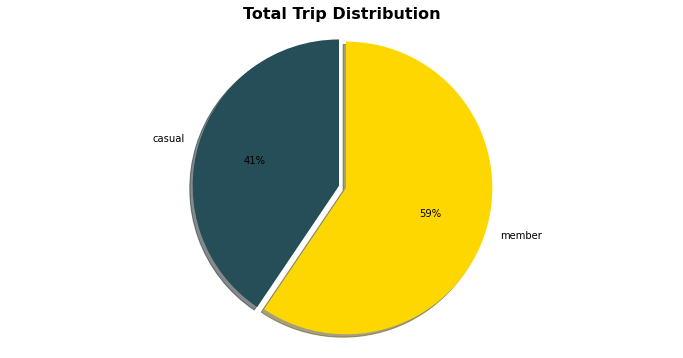

In [380]:
# Pie chart of Trip Distribution
plt.figure(figsize=(12, 6))
plt.pie(rider_total_trips['trip_count'], labels=rider_total_trips['rider_type'], autopct='%1.0f%%', 
        explode = (0.05, 0), shadow=True, startangle=90, colors=custom_colors)
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 14
plt.title('Total Trip Distribution', chart_style)
plt.axis('equal')
plt.show()

In [381]:
# Total number of trips by bike type

bike_trips = cyclistic_df.groupby(['bike_type']).size().reset_index(name='trip_count')
bike_trips

,bike_type,trip_count
0,classic_bike,2646706
1,docked_bike,177477
2,electric_bike,2952421


In [382]:
# Percentage of trips by bike

bike_trips['percentage'] = (bike_trips['trip_count'] / total_trips) * 100
bike_trips

,bike_type,trip_count,percentage
0,classic_bike,2646706,45.817681
1,docked_bike,177477,3.072341
2,electric_bike,2952421,51.109977


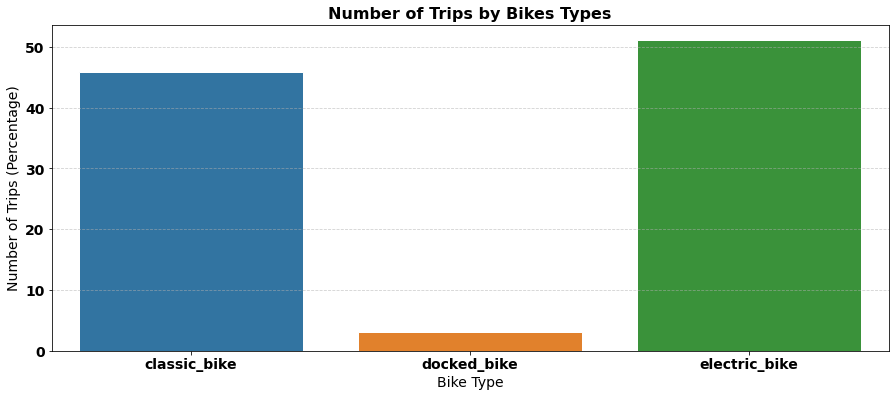

In [383]:
# Number of trips by Bike Use
# Bar Chart
plt.figure(figsize=(15, 6))
sns.barplot(data=bike_trips, x='bike_type', y='percentage',
            edgecolor='white', errorbar=None)
plt.xlabel('Bike Type')
plt.ylabel('Number of Trips (Percentage)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.title('Number of Trips by Bikes Types', chart_style)
plt.show()

In [384]:
# Total number of trips by bike type in rider groups

rider_bike_trips = cyclistic_df.groupby(['bike_type', 'rider_type']).size().reset_index(name='trip_count')
rider_bike_trips

,bike_type,rider_type,trip_count
0,classic_bike,casual,898681
1,classic_bike,member,1748025
2,docked_bike,casual,177477
3,electric_bike,casual,1266281
4,electric_bike,member,1686140


In [385]:
rider_bike_trips['percentage'] = (rider_bike_trips['trip_count'] / total_trips) * 100
rider_bike_trips

,bike_type,rider_type,trip_count,percentage
0,classic_bike,casual,898681,15.557255
1,classic_bike,member,1748025,30.260426
2,docked_bike,casual,177477,3.072341
3,electric_bike,casual,1266281,21.920855
4,electric_bike,member,1686140,29.189122


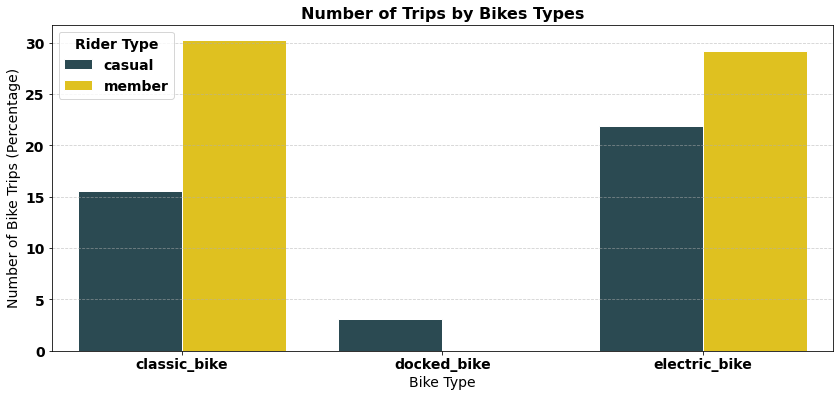

In [386]:
# Number of trips by Bike Type btw rider groups
# Bar Chart
plt.figure(figsize=(14, 6))
sns.barplot(data=rider_bike_trips, x='bike_type', y='percentage', hue='rider_type', 
            palette=custom_colors, edgecolor='white', errorbar=None)
plt.xlabel('Bike Type')
plt.ylabel('Number of Bike Trips (Percentage)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.title('Number of Trips by Bikes Types', chart_style)
plt.legend(title='Rider Type')
plt.show()

In [387]:
# Total number of trips by hour

hours = cyclistic_df['started_at'].dt.hour
hour_trips = cyclistic_df.groupby([hours]).size().reset_index(name='trip_count')
hour_trips

,started_at,trip_count
0,0,83718
1,1,52773
2,2,31920
3,3,19293
4,4,16757
5,5,45426
6,6,125030
7,7,231159
8,8,283685
9,9,221354


In [388]:
hour_trips['percentage'] = (hour_trips['trip_count'] / total_trips) * 100
hour_trips

,started_at,trip_count,percentage
0,0,83718,1.449260
1,1,52773,0.913564
2,2,31920,0.552574
3,3,19293,0.333985
4,4,16757,0.290084
5,5,45426,0.786379
6,6,125030,2.164420
7,7,231159,4.001642
8,8,283685,4.910930
9,9,221354,3.831905


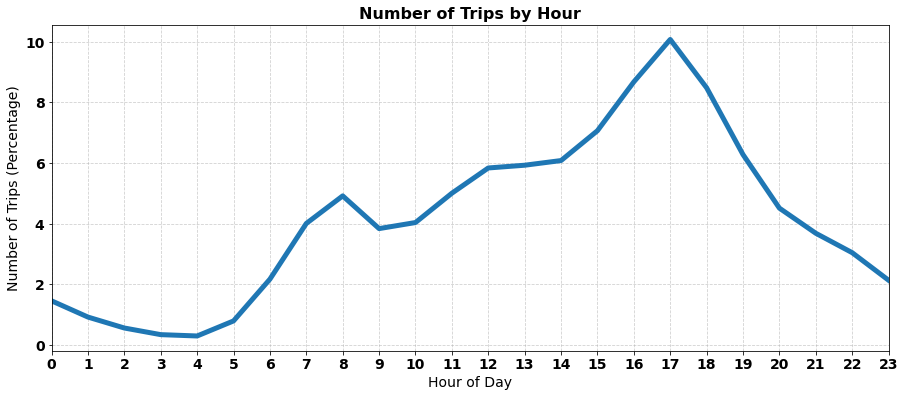

In [389]:
# Total number of trips by hour
# Line plot
plt.figure(figsize=(15, 6))
sns.lineplot(data=hour_trips, x='started_at', y='percentage', linewidth=5, errorbar=None)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips (Percentage)') 
plt.xlim(0, 23)
plt.xticks(range(24))
plt.grid(linestyle='--', alpha=0.6)
plt.title('Number of Trips by Hour', chart_style)
plt.show()

In [390]:
# Total number of trips by hour in rider groups

rider_hour_trips = cyclistic_df.groupby([hours, 'rider_type']).size().reset_index(name='trip_count')
rider_hour_trips['percentage'] = (rider_hour_trips['trip_count'] / total_trips) * 100
rider_hour_trips.head()

,started_at,rider_type,trip_count,percentage
0,0,casual,46687,0.808208
1,0,member,37031,0.641051
2,1,casual,30153,0.521985
3,1,member,22620,0.391580
4,2,casual,18733,0.324291


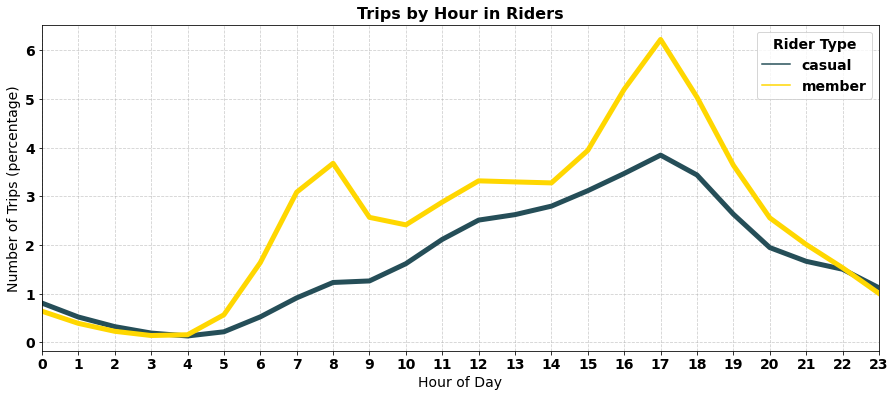

In [391]:
# Number of trips by hour in rider groups
# Line plot
plt.figure(figsize=(15, 6))
sns.lineplot(data=rider_hour_trips, x='started_at', y='percentage', hue='rider_type', 
             palette=custom_colors, linewidth=5)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips (percentage)') 
plt.legend(title='Rider Type')
plt.xlim(0, 23)
plt.xticks(range(24))
plt.grid(linestyle='--', alpha=0.6)
plt.title('Trips by Hour in Riders', chart_style)
plt.show()

In [392]:
# Number of trips by weekday

weekday_trips = cyclistic_df.groupby(['day_of_week']).size().reset_index(name='trip_count')
weekday_trips

,day_of_week,trip_count
0,Friday,812515
1,Monday,764548
2,Saturday,925770
3,Sunday,794488
4,Thursday,853073
5,Tuesday,811511
6,Wednesday,814699


In [393]:
weekday_trips['percentage'] = (weekday_trips['trip_count'] / total_trips) * 100
weekday_trips

,day_of_week,trip_count,percentage
0,Friday,812515,14.065617
1,Monday,764548,13.235250
2,Saturday,925770,16.026198
3,Sunday,794488,13.753548
4,Thursday,853073,14.767725
5,Tuesday,811511,14.048237
6,Wednesday,814699,14.103425


In [394]:
# Sorted by weekday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_trips['day_of_week'] = pd.Categorical(weekday_trips['day_of_week'], categories=day_order, ordered=True)
weekday_trips.sort_values(by='day_of_week', inplace=True)
weekday_trips

,day_of_week,trip_count,percentage
1,Monday,764548,13.235250
5,Tuesday,811511,14.048237
6,Wednesday,814699,14.103425
4,Thursday,853073,14.767725
0,Friday,812515,14.065617
2,Saturday,925770,16.026198
3,Sunday,794488,13.753548


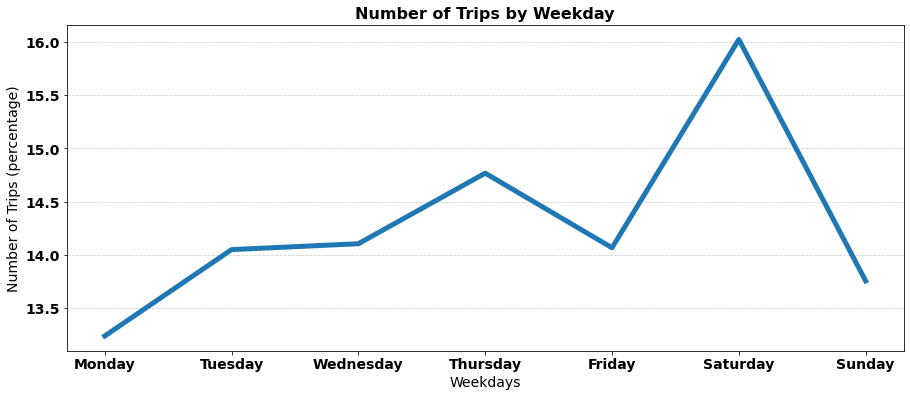

In [395]:
# Number of trips by weekday
# Line plot
plt.figure(figsize=(15, 6))
sns.lineplot(data=weekday_trips, x='day_of_week', y='percentage', 
             linewidth=5, errorbar=None)
plt.xlabel('Weekdays')
plt.ylabel('Number of Trips (percentage)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.title('Number of Trips by Weekday', chart_style)
plt.show()

In [396]:
# Number of trips by weekday in rider group

rider_weekday_trips = cyclistic_df.groupby(['day_of_week', 'rider_type']).size().reset_index(name='trip_count')
rider_weekday_trips

,day_of_week,rider_type,trip_count
0,Friday,casual,335460
1,Friday,member,477055
2,Monday,casual,280344
3,Monday,member,484204
4,Saturday,casual,474497
5,Saturday,member,451273
6,Sunday,casual,394917
7,Sunday,member,399571
8,Thursday,casual,310496
9,Thursday,member,542577


In [397]:
rider_weekday_trips['percentage'] = (rider_weekday_trips['trip_count'] / total_trips) * 100
rider_weekday_trips

,day_of_week,rider_type,trip_count,percentage
0,Friday,casual,335460,5.807218
1,Friday,member,477055,8.258399
2,Monday,casual,280344,4.853094
3,Monday,member,484204,8.382157
4,Saturday,casual,474497,8.214117
5,Saturday,member,451273,7.812081
6,Sunday,casual,394917,6.836491
7,Sunday,member,399571,6.917057
8,Thursday,casual,310496,5.375061
9,Thursday,member,542577,9.392664


In [398]:
# sorted by weekday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rider_weekday_trips['day_of_week'] = pd.Categorical(rider_weekday_trips['day_of_week'], categories=day_order, ordered=True)
rider_weekday_trips.sort_values(by='day_of_week', inplace=True)
rider_weekday_trips

,day_of_week,rider_type,trip_count,percentage
2,Monday,casual,280344,4.853094
3,Monday,member,484204,8.382157
10,Tuesday,casual,269545,4.666150
11,Tuesday,member,541966,9.382087
12,Wednesday,casual,277180,4.798321
13,Wednesday,member,537519,9.305104
8,Thursday,casual,310496,5.375061
9,Thursday,member,542577,9.392664
0,Friday,casual,335460,5.807218
1,Friday,member,477055,8.258399


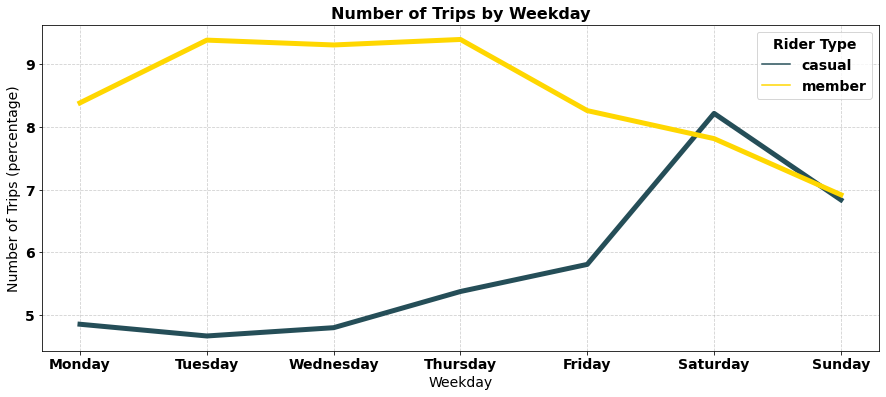

In [399]:
# Number of trips by weekday in rider group
# Line plot
plt.figure(figsize=(15, 6))
sns.lineplot(data=rider_weekday_trips, x='day_of_week', y='percentage', hue = 'rider_type', 
            palette=custom_colors, linewidth=5, errorbar=None)
plt.xlabel('Weekday')
plt.ylabel('Number of Trips (percentage)')
plt.legend(title='Rider Type')
plt.grid( linestyle='--', alpha=0.6)
plt.title('Number of Trips by Weekday', chart_style)
plt.show()

In [400]:
# Number of trips by month

month = cyclistic_df['started_at'].dt.strftime('%B')
month_trips = cyclistic_df.groupby([month]).size().reset_index(name='trip_count')
month_trips

,started_at,trip_count
0,April,367593
1,August,779943
2,December,180236
3,February,188409
4,January,188228
5,July,817583
6,June,762737
7,March,281481
8,May,628973
9,November,333990


In [401]:
month_trips['percentage'] = (month_trips['trip_count'] / total_trips) * 100
month_trips

,started_at,trip_count,percentage
0,April,367593,6.363479
1,August,779943,13.501756
2,December,180236,3.120103
3,February,188409,3.261588
4,January,188228,3.258454
5,July,817583,14.153350
6,June,762737,13.203900
7,March,281481,4.872776
8,May,628973,10.888283
9,November,333990,5.781771


In [402]:
# sorted by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']
month_trips['started_at'] = pd.Categorical(month_trips['started_at'], categories=month_order, ordered=True)
month_trips.sort_values(by='started_at', inplace=True)
month_trips

,started_at,trip_count,percentage
4,January,188228,3.258454
3,February,188409,3.261588
7,March,281481,4.872776
0,April,367593,6.363479
8,May,628973,10.888283
6,June,762737,13.203900
5,July,817583,14.153350
1,August,779943,13.501756
11,September,694799,12.027811
10,October,552632,9.566728


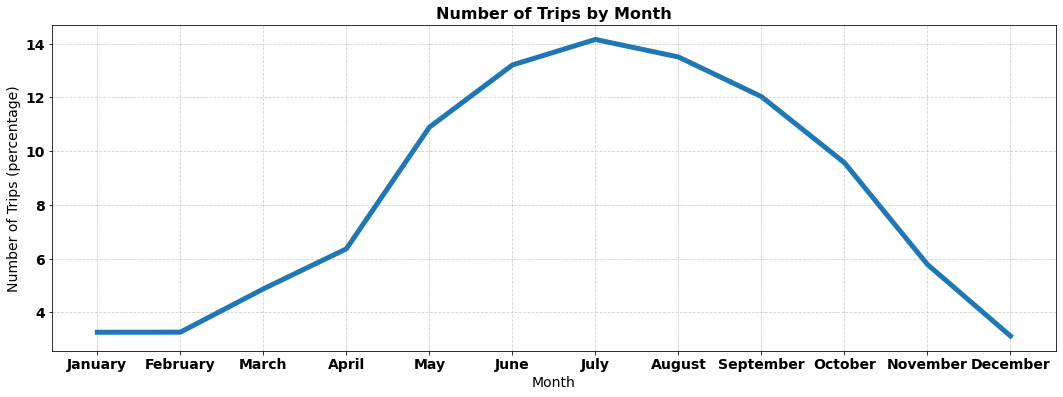

In [403]:
# Line plot
plt.figure(figsize=(18, 6))
sns.lineplot(data=month_trips, x='started_at', y='percentage',
            linewidth=5, errorbar=None)
plt.xlabel('Month')
plt.ylabel('Number of Trips (percentage)') 
plt.grid(linestyle='--', alpha=0.6)
plt.title('Number of Trips by Month', chart_style)
plt.show()

In [404]:
# Number of trips by month in rider group

month = cyclistic_df['started_at'].dt.strftime('%B')
rider_month_trips = cyclistic_df.groupby([month, 'rider_type']).size().reset_index(name='trip_count')
rider_month_trips

,started_at,rider_type,trip_count
0,April,casual,125033
1,April,member,242560
2,August,casual,356094
3,August,member,423849
4,December,casual,44425
5,December,member,135811
6,February,casual,42347
7,February,member,146062
8,January,casual,39400
9,January,member,148828


In [405]:
rider_month_trips['percentage'] = (rider_month_trips['trip_count'] / total_trips) * 100
rider_month_trips.head()

,started_at,rider_type,trip_count,percentage
0,April,casual,125033,2.164472
1,April,member,242560,4.199007
2,August,casual,356094,6.164418
3,August,member,423849,7.337339
4,December,casual,44425,0.769050


In [406]:
# sorted by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']
rider_month_trips['started_at'] = pd.Categorical(rider_month_trips['started_at'], categories=month_order, ordered=True)
rider_month_trips.sort_values(by='started_at', inplace=True)
rider_month_trips

,started_at,rider_type,trip_count,percentage
8,January,casual,39400,0.682062
9,January,member,148828,2.576393
6,February,casual,42347,0.733078
7,February,member,146062,2.528510
15,March,member,192475,3.331975
14,March,casual,89006,1.540801
0,April,casual,125033,2.164472
1,April,member,242560,4.199007
17,May,member,351271,6.080926
16,May,casual,277702,4.807357


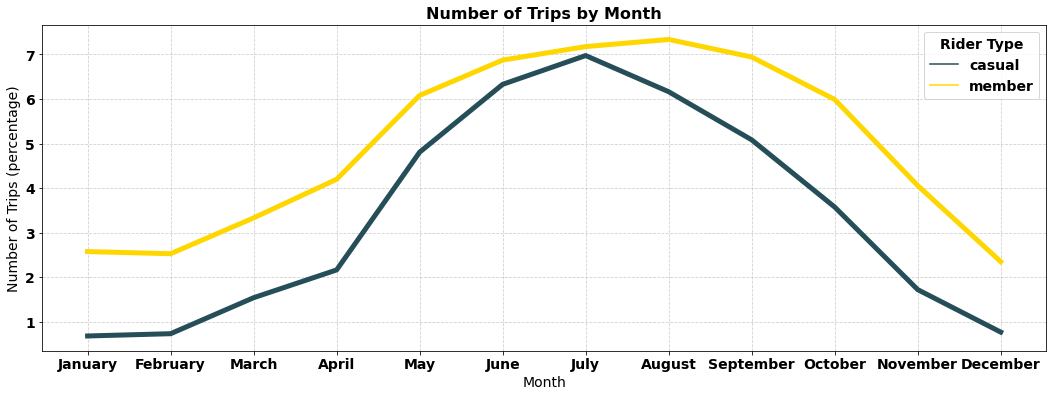

In [407]:
# Number of trips by month in rider group
# Line plot
plt.figure(figsize=(18, 6))
sns.lineplot(data=rider_month_trips, x='started_at', y='percentage', hue = 'rider_type', 
            palette=custom_colors, linewidth=5, errorbar=None)
plt.xlabel('Month')
plt.ylabel('Number of Trips (percentage)')
plt.legend(title='Rider Type')
plt.grid(linestyle='--', alpha=0.6)
plt.title('Number of Trips by Month', chart_style)
plt.show()

In [408]:
# Total number of trips by Start station name

start_station_trips = cyclistic_df.groupby(['start_station_name']).size().reset_index(name='trip_count')
start_station_trips

,start_station_name,trip_count
0,10101 S Stony Island Ave,3
1,111th St - Morgan Park Metra,14
2,2112 W Peterson Ave,1723
3,532 E 43rd St,143
4,63rd & Western Ave - north corner,51
...,...,...
1682,Yale Ave & 119th St,4
1683,Yates Blvd & 75th St,632
1684,Yates Blvd & 93rd St,122
1685,Yates Blvd & Exchange Ave,237


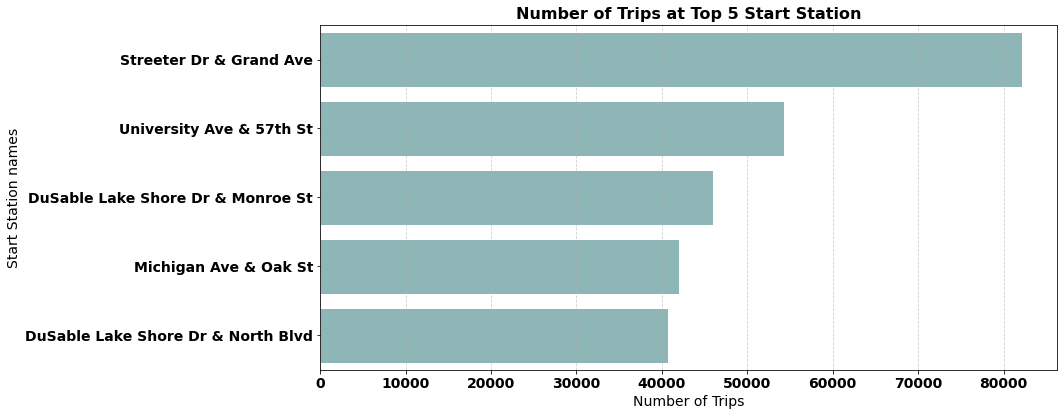

In [409]:
# Number of trips by Top 5 Start station names
# Bar Chart
top_5_start_stations = start_station_trips.nlargest(5, 'trip_count')

plt.figure(figsize=(15, 6))
sns.barplot(data=top_5_start_stations, x='trip_count', y='start_station_name',
            palette=custom_color, edgecolor='white', errorbar=None)
plt.xlabel('Number of Trips')
plt.ylabel('Start Station names')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.title('Number of Trips at Top 5 Start Station', chart_style)
plt.tight_layout()
plt.show()

In [410]:
# Number of trips by Start station name in rider groups

rider_start_trips = cyclistic_df.groupby(['start_station_name', 'rider_type']).size().reset_index(name='trip_count')
rider_start_trips

,start_station_name,rider_type,trip_count
0,10101 S Stony Island Ave,casual,3
1,111th St - Morgan Park Metra,casual,7
2,111th St - Morgan Park Metra,member,7
3,2112 W Peterson Ave,casual,590
4,2112 W Peterson Ave,member,1133
...,...,...,...
3197,Yates Blvd & 93rd St,member,63
3198,Yates Blvd & Exchange Ave,casual,85
3199,Yates Blvd & Exchange Ave,member,152
3200,Zapata Academy,casual,6


In [411]:
# Top 5 trips by start station name in rider groups
largest_trips_by_member = rider_start_trips[rider_start_trips['rider_type'] == 'member'].nlargest(5, 'trip_count')
largest_trips_by_casual = rider_start_trips[rider_start_trips['rider_type'] == 'casual'].nlargest(5, 'trip_count')
largest_start_trips = pd.concat([largest_trips_by_member, largest_trips_by_casual])
largest_start_trips.sort_values(by=['rider_type', 'trip_count'], ascending=[True, False], inplace=True)
largest_start_trips

,start_station_name,rider_type,trip_count
2898,Streeter Dr & Grand Ave,casual,62958
684,DuSable Lake Shore Dr & Monroe St,casual,34952
1526,Michigan Ave & Oak St,casual,26689
1540,Millennium Park,casual,26425
686,DuSable Lake Shore Dr & North Blvd,casual,23962
2945,University Ave & 57th St,member,44510
1176,Kingsbury St & Kinzie St,member,28786
327,Canal St & Adams St,member,23540
736,Ellis Ave & 60th St,member,22963
464,Clark St & Elm St,member,22871


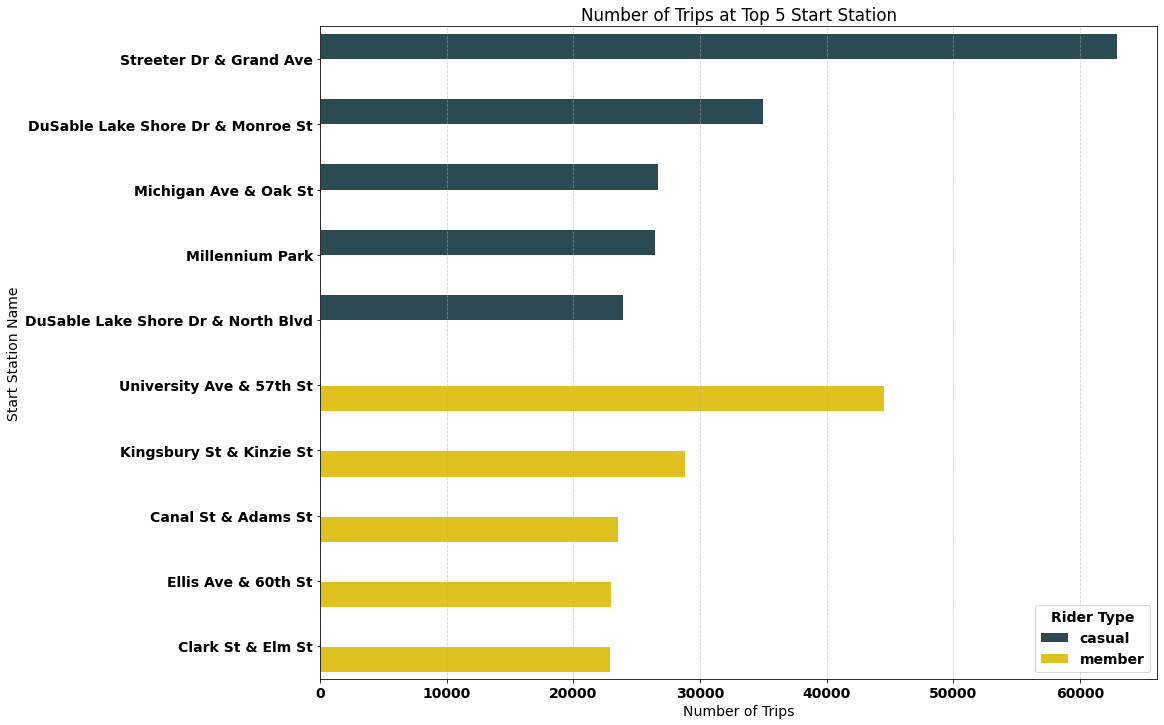

In [412]:
# Top 5 trips by Start station name in rider groups
# Bar Chart
plt.figure(figsize=(15, 12)) 
sns.barplot(data=largest_start_trips, x='trip_count', y='start_station_name', hue='rider_type',
            palette=custom_colors, edgecolor='white', errorbar=None)
plt.xlabel('Number of Trips')
plt.ylabel('Start Station Name')
plt.title('Number of Trips at Top 5 Start Station')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend(title='Rider Type')
plt.show()

In [413]:
# Total number of trips by End station name

end_station_trips = cyclistic_df.groupby(['end_station_name']).size().reset_index(name='trip_count')
end_station_trips

,end_station_name,trip_count
0,10101 S Stony Island Ave,8
1,111th St - Morgan Park Metra,14
2,2112 W Peterson Ave,1932
3,532 E 43rd St,36
4,63rd & Western Ave - north corner,64
...,...,...
1709,Yale Ave & 119th St,6
1710,Yates Blvd & 75th St,556
1711,Yates Blvd & 93rd St,98
1712,Yates Blvd & Exchange Ave,127


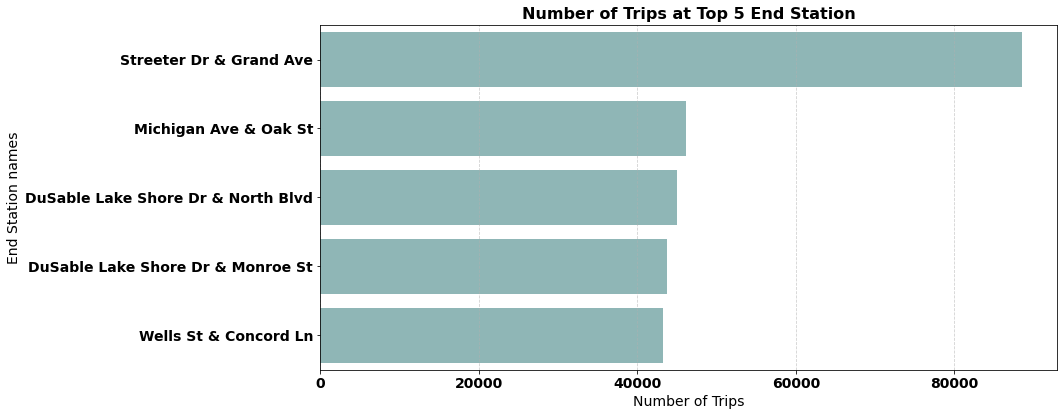

In [414]:
# Number of trips by Top 5 End station name
# Bar Chart
top_5_end_stations = end_station_trips.nlargest(5, 'trip_count')

plt.figure(figsize=(15, 6))
sns.barplot(data=top_5_end_stations, x='trip_count', y='end_station_name',
            palette=custom_color)
plt.xlabel('Number of Trips')
plt.ylabel('End Station names')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.title('Number of Trips at Top 5 End Station', chart_style)
plt.tight_layout()
plt.show()

In [415]:
# Number of trips by End station name in rider groups

rider_end_trips = cyclistic_df.groupby(['end_station_name', 'rider_type']).size().reset_index(name='trip_count')
rider_end_trips

,end_station_name,rider_type,trip_count
0,10101 S Stony Island Ave,casual,6
1,10101 S Stony Island Ave,member,2
2,111th St - Morgan Park Metra,casual,7
3,111th St - Morgan Park Metra,member,7
4,2112 W Peterson Ave,casual,795
...,...,...,...
3205,Yates Blvd & 93rd St,member,37
3206,Yates Blvd & Exchange Ave,casual,39
3207,Yates Blvd & Exchange Ave,member,88
3208,Zapata Academy,casual,1


In [416]:
# Top 5 trips by End station name in rider groups
largest_trips_by_member = rider_end_trips[rider_end_trips['rider_type'] == 'member'].nlargest(5, 'trip_count')
largest_trips_by_casual = rider_end_trips[rider_end_trips['rider_type'] == 'casual'].nlargest(5, 'trip_count')
largest_end_trips = pd.concat([largest_trips_by_member, largest_trips_by_casual])
largest_end_trips.sort_values(by=['rider_type', 'trip_count'], ascending=[True, False], inplace=True)
largest_end_trips

,end_station_name,rider_type,trip_count
2901,Streeter Dr & Grand Ave,casual,66050
689,DuSable Lake Shore Dr & Monroe St,casual,31849
1535,Michigan Ave & Oak St,casual,29604
1549,Millennium Park,casual,29082
691,DuSable Lake Shore Dr & North Blvd,casual,27654
741,Ellis Ave & 60th St,member,29676
2953,University Ave & 57th St,member,29072
1183,Kingsbury St & Kinzie St,member,27722
468,Clark St & Elm St,member,25551
3035,Wells St & Concord Ln,member,25296


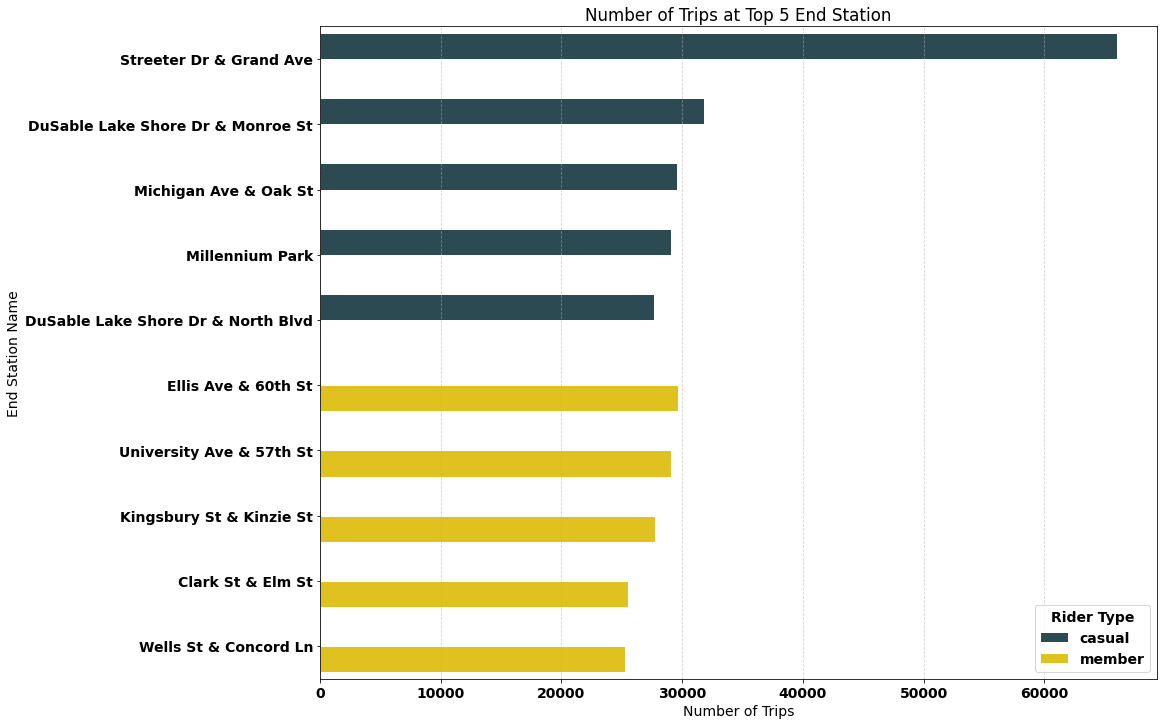

In [417]:
# Top 5 trips by End station name in rider groups
# Bar Chart
plt.figure(figsize=(15, 12)) 
sns.barplot(data=largest_end_trips, x='trip_count', y='end_station_name', hue='rider_type',
            palette=custom_colors, edgecolor='white', errorbar=None)
plt.xlabel('Number of Trips')
plt.ylabel('End Station Name')
plt.title('Number of Trips at Top 5 End Station')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend(title='Rider Type')
plt.show()

##### Routes

In [418]:
# Number of trips by End station name per rider groups

stations_trips = cyclistic_df.groupby(['start_station_name', 'end_station_name', 
                                       'rider_type']).size().reset_index(name='trip_count')
stations_trips

,start_station_name,end_station_name,rider_type,trip_count
0,10101 S Stony Island Ave,Phillips Ave & 83rd St,casual,3
1,111th St - Morgan Park Metra,111th St - Morgan Park Metra,casual,1
2,111th St - Morgan Park Metra,Halsted St & 96th St,casual,1
3,111th St - Morgan Park Metra,Halsted St & 96th St,member,2
4,111th St - Morgan Park Metra,Homewood Ave & Monterey Ave,member,1
...,...,...,...,...
318773,Zapata Academy,Komensky Ave & 31st St,member,1
318774,Zapata Academy,Mayfield & Roosevelt Rd,casual,1
318775,Zapata Academy,Pulaski Rd & 21st St,casual,1
318776,Zapata Academy,State St & Pershing Rd,member,1


In [419]:
# Number of Trips by Routes in days
stations_trips['routes'] = stations_trips['start_station_name'] + ' to ' + stations_trips['end_station_name']
routes_trips = stations_trips[['routes', 'rider_type', 'trip_count']]
routes_trips

,routes,rider_type,trip_count
0,10101 S Stony Island Ave to Phillips Ave & 83r...,casual,3
1,111th St - Morgan Park Metra to 111th St - Mor...,casual,1
2,111th St - Morgan Park Metra to Halsted St & 9...,casual,1
3,111th St - Morgan Park Metra to Halsted St & 9...,member,2
4,111th St - Morgan Park Metra to Homewood Ave &...,member,1
...,...,...,...
318773,Zapata Academy to Komensky Ave & 31st St,member,1
318774,Zapata Academy to Mayfield & Roosevelt Rd,casual,1
318775,Zapata Academy to Pulaski Rd & 21st St,casual,1
318776,Zapata Academy to State St & Pershing Rd,member,1


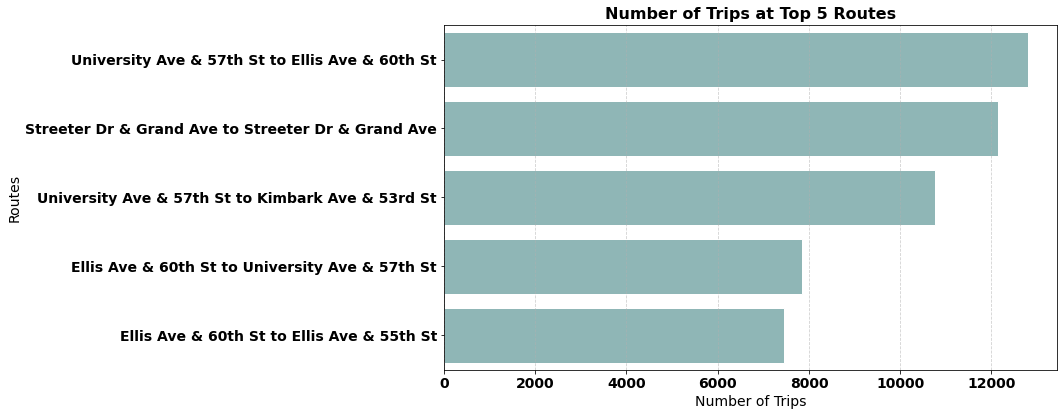

In [420]:
# Number of Trips by Top 5 Routes
# Bar Chart
top_5_routes = routes_trips.nlargest(5, 'trip_count')

plt.figure(figsize=(15, 6))
sns.barplot(data=top_5_routes, x='trip_count', y='routes',
            palette=custom_color, edgecolor='white', errorbar=None)
plt.xlabel('Number of Trips')
plt.ylabel('Routes')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.title('Number of Trips at Top 5 Routes', chart_style)
plt.tight_layout()
plt.show()

In [421]:
# Top 5 trips by Routes in rider groups
largest_route_trips_by_member = routes_trips[routes_trips['rider_type'] == 'member'].nlargest(5, 'trip_count')
largest_route_trips_by_casual = routes_trips[routes_trips['rider_type'] == 'casual'].nlargest(5, 'trip_count')
largest_rider_route_trips = pd.concat([largest_route_trips_by_member, largest_route_trips_by_casual])
largest_rider_route_trips.sort_values(by=['rider_type', 'trip_count'], ascending=[True, False], inplace=True)
largest_rider_route_trips

,routes,rider_type,trip_count
279932,Streeter Dr & Grand Ave to Streeter Dr & Grand...,casual,12137
97583,DuSable Lake Shore Dr & Monroe St to DuSable L...,casual,7195
98043,DuSable Lake Shore Dr & Monroe St to Streeter ...,casual,5915
188163,Michigan Ave & Oak St to Michigan Ave & Oak St,casual,4844
192151,Millennium Park to Millennium Park,casual,4531
283782,University Ave & 57th St to Ellis Ave & 60th St,member,12796
283838,University Ave & 57th St to Kimbark Ave & 53rd St,member,10757
103799,Ellis Ave & 60th St to University Ave & 57th St,member,7841
103663,Ellis Ave & 60th St to Ellis Ave & 55th St,member,7458
103169,Ellis Ave & 55th St to Ellis Ave & 60th St,member,5916


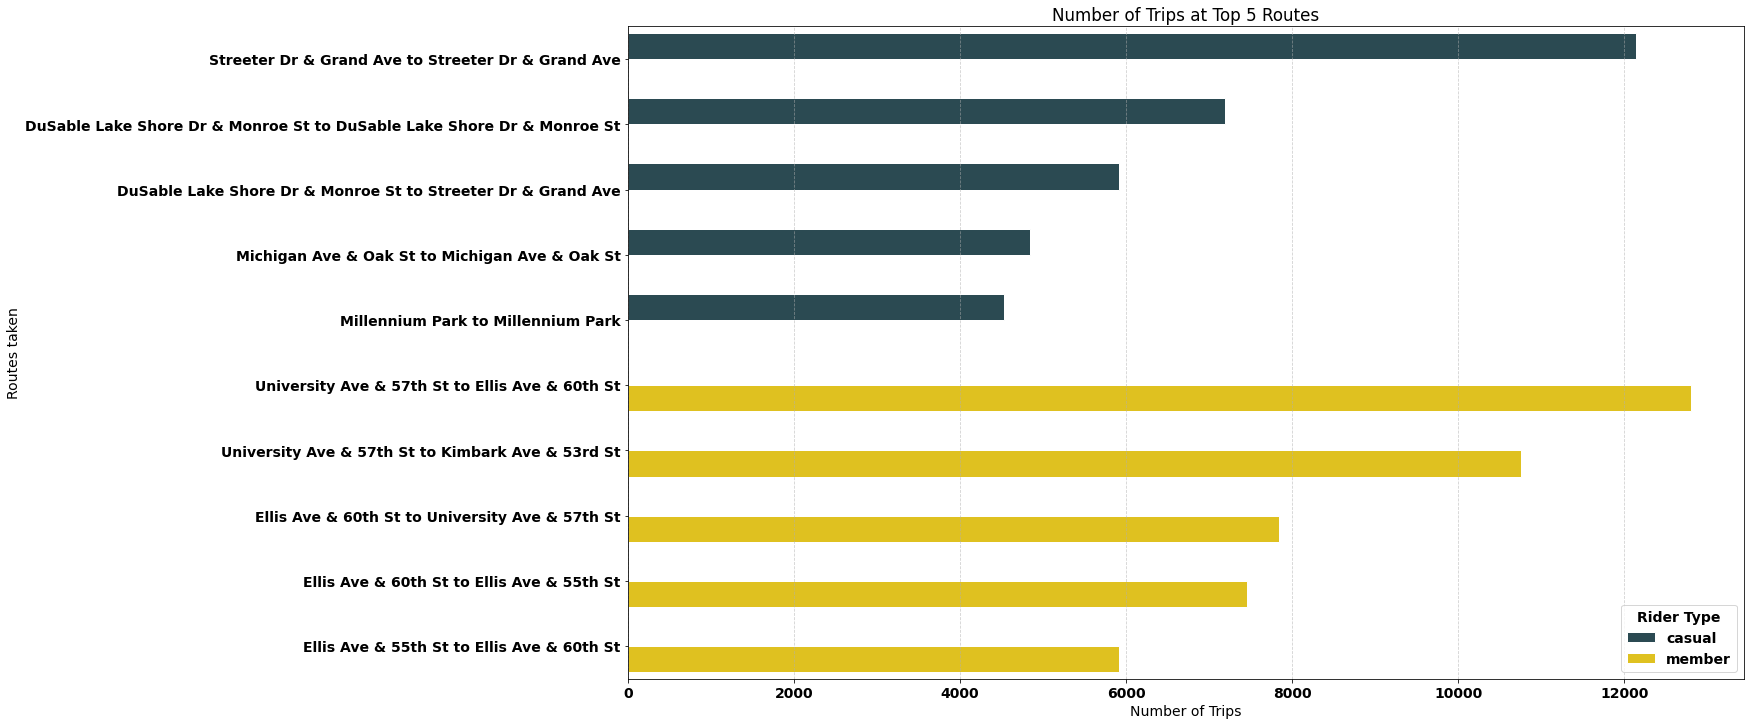

In [422]:
# Top 5 trips by Routes in rider groups
# Bar Chart
plt.figure(figsize=(20, 12)) 
sns.barplot(data=largest_rider_route_trips, x='trip_count', y='routes', hue='rider_type',
            palette=custom_colors, edgecolor='white', errorbar=None)
plt.xlabel('Number of Trips')
plt.ylabel('Routes taken')
plt.title('Number of Trips at Top 5 Routes')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend(title='Rider Type')
plt.show()

#### What was the trip time?

Trip Time and Trip Duration are used interchangeably.

In [423]:
# Total trip time
trip_time_min = cyclistic_df['ride_length'] / 60

total_trip_time = sum(trip_time_min)
total_trip_time

110770340.53331514

In [424]:
# Average trip time

average_trip_time = trip_time_min.mean()
print(f"Total average Trip time (minutes): {average_trip_time:.2f}")

Total average Trip time (minutes): 19.18


In [425]:
# Average trip time by rider group

rider_average_trip_time = (cyclistic_df.groupby(['rider_type'])
                               ['ride_length'].mean() / 60).reset_index(name='average_trip_time')
print("Average Trip Duration (minutes):")
rider_average_trip_time

Average Trip Duration (minutes):


,rider_type,average_trip_time
0,casual,28.879792
1,member,12.556528


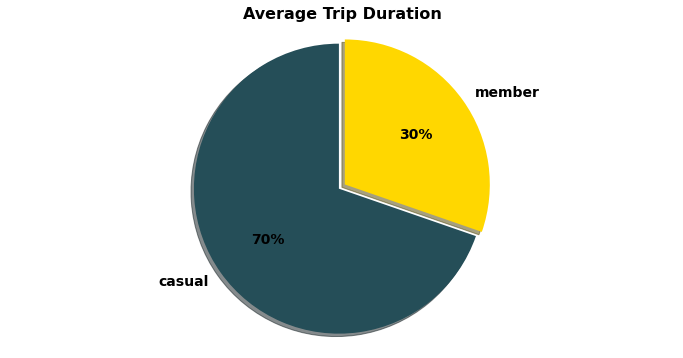

In [426]:
# Create a pie chart
plt.figure(figsize=(12, 6))
plt.pie(rider_average_trip_time['average_trip_time'], labels=rider_average_trip_time['rider_type'], 
        autopct='%1.0f%%', explode = (0.05, 0), shadow=True, startangle=90, colors=custom_colors)
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 14
plt.title('Average Trip Duration', chart_style)
plt.axis('equal')
plt.show()

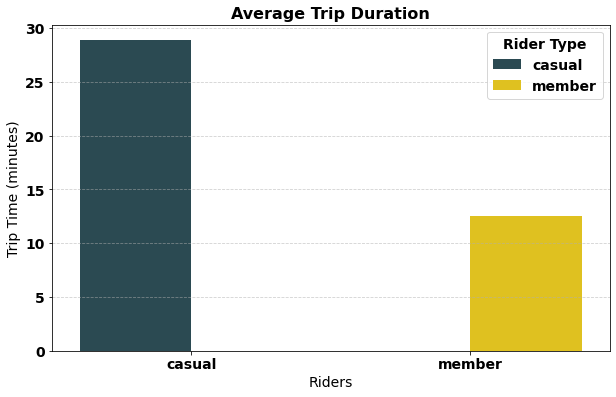

In [427]:
# Trip Time by Rider group
# Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(data=rider_average_trip_time, x='rider_type', y= 'average_trip_time',  
            hue = 'rider_type', errorbar=None, palette=custom_colors)
plt.xlabel('Riders')
plt.ylabel('Trip Time (minutes)')
plt.legend(title='Rider Type')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.title('Average Trip Duration', chart_style)
plt.show()

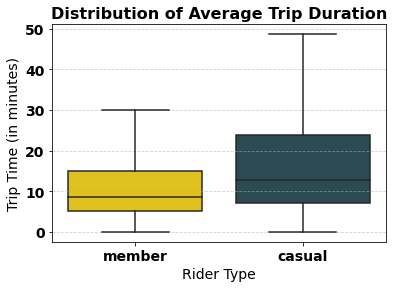

In [428]:
# Trip time by Rider group
#Box plot
sns.boxplot(x=cyclistic_df['rider_type'], 
            y=trip_time_min, palette=custom_colors2, 
            showfliers=False)
plt.xlabel('Rider Type')
plt.ylabel('Trip Time (in minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.title('Distribution of Average Trip Duration', chart_style)
plt.show()

In [429]:
# Average trip time by bike type per rider
average_bike_trip_time = (cyclistic_df.groupby(['rider_type', 'bike_type'])
                               ['ride_length'].mean() / 60).reset_index(name='average_trip_time')
print("Average Trip time by Bike type (minutes):")
average_bike_trip_time

Average Trip time by Bike type (minutes):


,rider_type,bike_type,average_trip_time
0,casual,classic_bike,28.462669
1,casual,docked_bike,123.023280
2,casual,electric_bike,15.981041
3,member,classic_bike,13.725642
4,member,electric_bike,11.344505


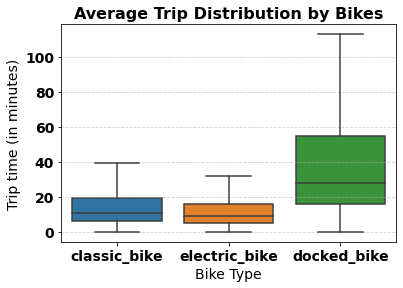

In [430]:
# Trip time by Bike Type
#Box plot
sns.boxplot(x=cyclistic_df['bike_type'], 
            y=trip_time_min,
            showfliers=False)
plt.xlabel('Bike Type')
plt.ylabel('Trip time (in minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.title('Average Trip Distribution by Bikes', chart_style)
plt.show()

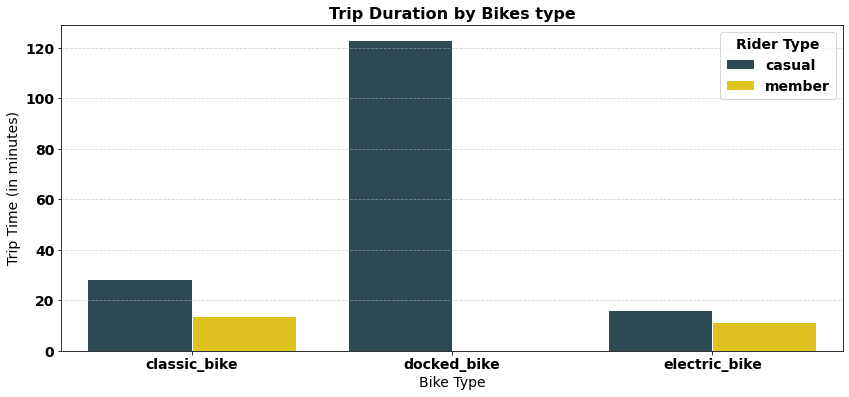

In [431]:
# Trip time by Bike Type per rider
# Bar Chart
plt.figure(figsize=(14, 6))
sns.barplot(data=average_bike_trip_time, x='bike_type', y='average_trip_time', hue='rider_type', 
            palette=custom_colors, edgecolor='white', errorbar=None)
plt.xlabel('Bike Type')
plt.ylabel('Trip Time (in minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.title('Trip Duration by Bikes type', chart_style)
plt.legend(title='Rider Type')
plt.show()

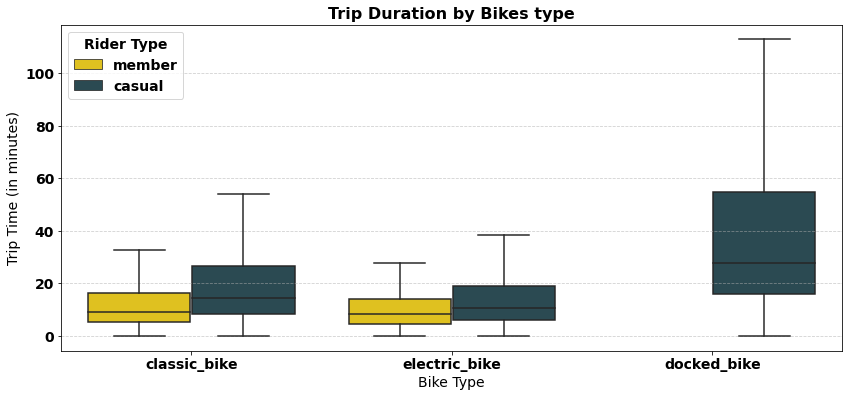

In [432]:
# Trip time by Bike Type in rider
#Box plot
plt.figure(figsize=(14, 6))
sns.boxplot(data=cyclistic_df, x='bike_type', y=trip_time_min, hue='rider_type', showfliers=False,
            palette=custom_colors2)
plt.xlabel('Bike Type')
plt.ylabel('Trip Time (in minutes)')
plt.legend(title='Rider Type')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.title('Trip Duration by Bikes type', chart_style)
plt.show()

In [433]:
# Trip time by hour

hours = cyclistic_df['started_at'].dt.hour
hour_mean_time = (cyclistic_df.groupby([hours])['ride_length'].mean() / 60).reset_index()
hour_mean_time

,started_at,ride_length
0,0,22.950360
1,1,26.650530
2,2,28.533201
3,3,29.697570
4,4,24.331519
5,5,15.160335
6,6,13.777530
7,7,13.294340
8,8,13.493996
9,9,16.042269


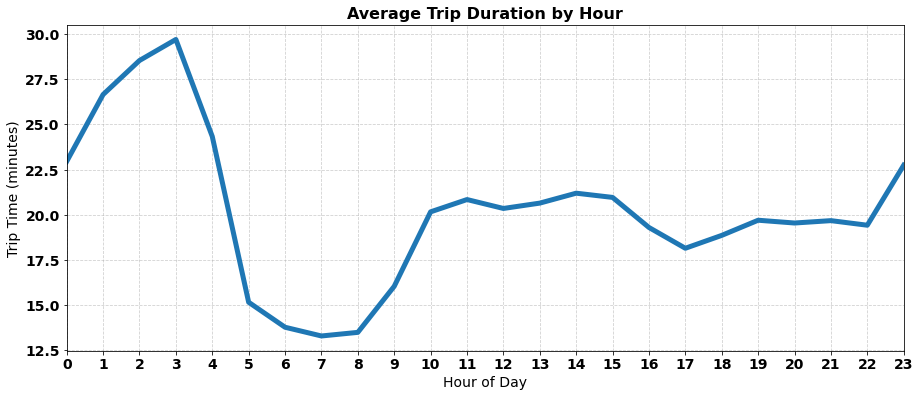

In [434]:
# Trip time by hour
# Line plot
plt.figure(figsize=(15, 6))
sns.lineplot(data=hour_mean_time, x='started_at', y='ride_length', linewidth=5, errorbar=None)
plt.xlabel('Hour of Day')
plt.ylabel('Trip Time (minutes)') 
plt.xlim(0, 23)
plt.xticks(range(24))
plt.grid(linestyle='--', alpha=0.6)
plt.title('Average Trip Duration by Hour', chart_style)
plt.show()

In [435]:
# Trip Time by hour per rider groups

rider_hour_mean_time = (cyclistic_df.groupby([hours, 'rider_type'])['ride_length'].mean() / 60).reset_index()
rider_hour_mean_time.head()

,started_at,rider_type,ride_length
0,0,casual,31.075214
1,0,member,12.706914
2,1,casual,36.686961
3,1,member,13.271728
4,2,casual,39.641460


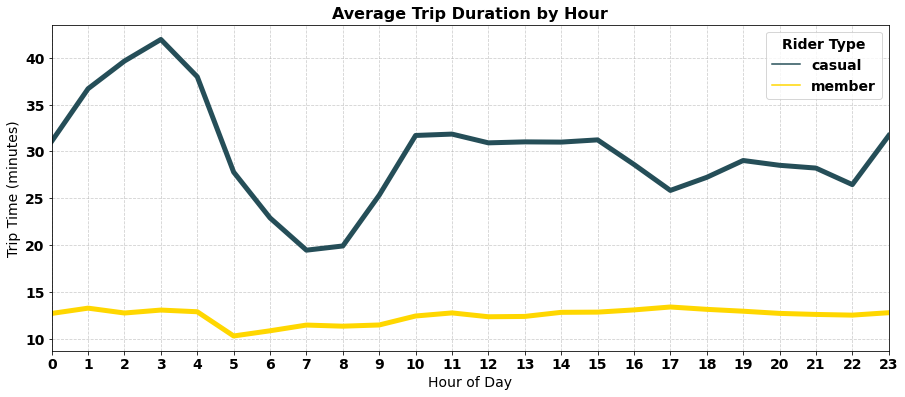

In [436]:
# Trip Time by hour per rider groups
# Line plot
plt.figure(figsize=(15, 6))
sns.lineplot(data=rider_hour_mean_time, x='started_at', y='ride_length', hue='rider_type', 
             palette=custom_colors, linewidth=5)
plt.xlabel('Hour of Day')
plt.ylabel('Trip Time (minutes)') 
plt.legend(title='Rider Type')
plt.xlim(0, 23)
plt.xticks(range(24))
plt.grid(linestyle='--', alpha=0.6)
plt.title('Average Trip Duration by Hour', chart_style)
plt.show()

In [437]:
# Trip Time by weekday

weekday_trip_time = (cyclistic_df.groupby(['day_of_week'])['ride_length'].mean() / 60).reset_index()
weekday_trip_time

,day_of_week,ride_length
0,Friday,18.734262
1,Monday,18.242994
2,Saturday,23.475696
3,Sunday,23.818620
4,Thursday,16.907634
5,Tuesday,16.426817
6,Wednesday,16.190195


In [438]:
# Sorted by weekday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_trip_time['day_of_week'] = pd.Categorical(weekday_trip_time['day_of_week'], categories=day_order, ordered=True)
weekday_trip_time.sort_values(by='day_of_week', inplace=True)
weekday_trip_time

,day_of_week,ride_length
1,Monday,18.242994
5,Tuesday,16.426817
6,Wednesday,16.190195
4,Thursday,16.907634
0,Friday,18.734262
2,Saturday,23.475696
3,Sunday,23.818620


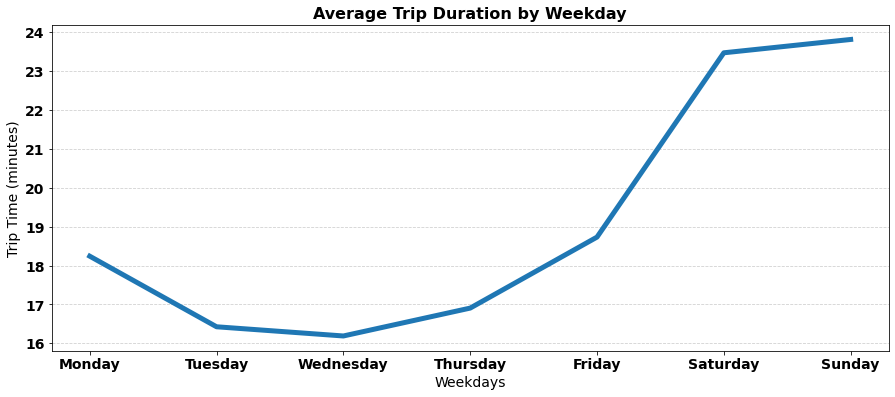

In [439]:
# Trip Time by weekday
# Line plot
plt.figure(figsize=(15, 6))
sns.lineplot(data=weekday_trip_time, x='day_of_week', y='ride_length', 
             linewidth=5, errorbar=None)
plt.xlabel('Weekdays')
plt.ylabel('Trip Time (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.title('Average Trip Duration by Weekday', chart_style)
plt.show()

In [440]:
# Trip Time by weekday in rider group

rider_weekday_trip_time = (cyclistic_df.groupby(['day_of_week', 'rider_type'])['ride_length'].mean() / 60).reset_index()
rider_weekday_trip_time

,day_of_week,rider_type,ride_length
0,Friday,casual,27.769267
1,Friday,member,12.380942
2,Monday,casual,28.794617
3,Monday,member,12.133825
4,Saturday,casual,32.482590
5,Saturday,member,14.005277
6,Sunday,casual,33.859839
7,Sunday,member,13.894356
8,Thursday,casual,25.240729
9,Thursday,member,12.138924


In [441]:
# sorted by weekday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rider_weekday_trip_time['day_of_week'] = pd.Categorical(rider_weekday_trip_time['day_of_week'], 
                                                        categories=day_order, ordered=True)
rider_weekday_trip_time.sort_values(by='day_of_week', inplace=True)
rider_weekday_trip_time

,day_of_week,rider_type,ride_length
2,Monday,casual,28.794617
3,Monday,member,12.133825
10,Tuesday,casual,25.495158
11,Tuesday,member,11.916708
12,Wednesday,casual,24.414891
13,Wednesday,member,11.949003
8,Thursday,casual,25.240729
9,Thursday,member,12.138924
0,Friday,casual,27.769267
1,Friday,member,12.380942


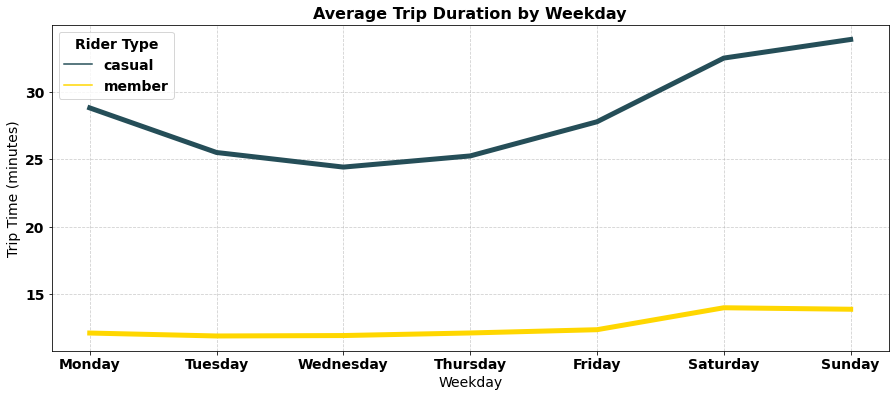

In [442]:
# Trip Time by weekday in rider group
# Line plot
plt.figure(figsize=(15, 6))
sns.lineplot(data=rider_weekday_trip_time, x='day_of_week', y='ride_length', hue = 'rider_type', 
            palette=custom_colors, linewidth=5, errorbar=None)
plt.xlabel('Weekday')
plt.ylabel('Trip Time (minutes)')
plt.legend(title='Rider Type')
plt.grid( linestyle='--', alpha=0.6)
plt.title('Average Trip Duration by Weekday', chart_style)
plt.show()

In [443]:
# Trip Time by by month

month = cyclistic_df['started_at'].dt.strftime('%B')
month_trip_time = (cyclistic_df.groupby([month])['ride_length'].mean() / 60).reset_index()
month_trip_time

,started_at,ride_length
0,April,17.537036
1,August,20.601444
2,December,13.516971
3,February,13.514254
4,January,12.951685
5,July,21.321540
6,June,22.625644
7,March,18.464315
8,May,21.048167
9,November,14.115041


In [444]:
# sorted by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']
month_trip_time['started_at'] = pd.Categorical(month_trip_time['started_at'], categories=month_order, ordered=True)
month_trip_time.sort_values(by='started_at', inplace=True)
month_trip_time

,started_at,ride_length
4,January,12.951685
3,February,13.514254
7,March,18.464315
0,April,17.537036
8,May,21.048167
6,June,22.625644
5,July,21.321540
1,August,20.601444
11,September,19.313834
10,October,17.328770


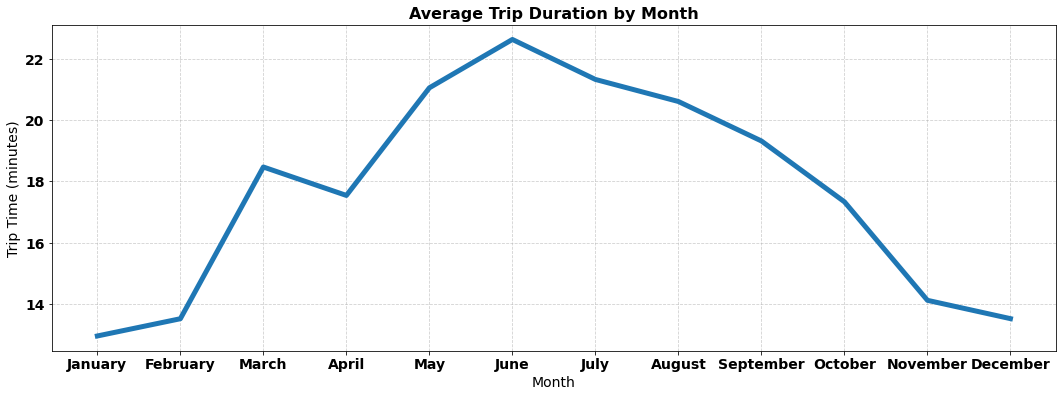

In [445]:
# Trip Time by by month
# Line plot
plt.figure(figsize=(18, 6))
sns.lineplot(data=month_trip_time, x='started_at', y='ride_length',
            linewidth=5, errorbar=None)
plt.xlabel('Month')
plt.ylabel('Trip Time (minutes)') 
plt.grid(linestyle='--', alpha=0.6)
plt.title('Average Trip Duration by Month', chart_style)
plt.show()

In [446]:
# Trip Time by month in rider group

month = cyclistic_df['started_at'].dt.strftime('%B')
rider_month_trip_time = (cyclistic_df.groupby([month, 'rider_type'])['ride_length'].mean() / 60).reset_index()
rider_month_trip_time

,started_at,rider_type,ride_length
0,April,casual,29.314339
1,April,member,11.466161
2,August,casual,29.229711
3,August,member,13.352462
4,December,casual,22.396446
5,December,member,10.612414
6,February,casual,23.291567
7,February,member,10.679568
8,January,casual,22.746188
9,January,member,10.358736


In [447]:
# sorted by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']
rider_month_trip_time['started_at'] = pd.Categorical(rider_month_trip_time['started_at'], categories=month_order, ordered=True)
rider_month_trip_time.sort_values(by='started_at', inplace=True)
rider_month_trip_time

,started_at,rider_type,ride_length
8,January,casual,22.746188
9,January,member,10.358736
6,February,casual,23.291567
7,February,member,10.679568
15,March,member,11.934456
14,March,casual,32.585101
0,April,casual,29.314339
1,April,member,11.466161
17,May,member,13.335320
16,May,casual,30.804307


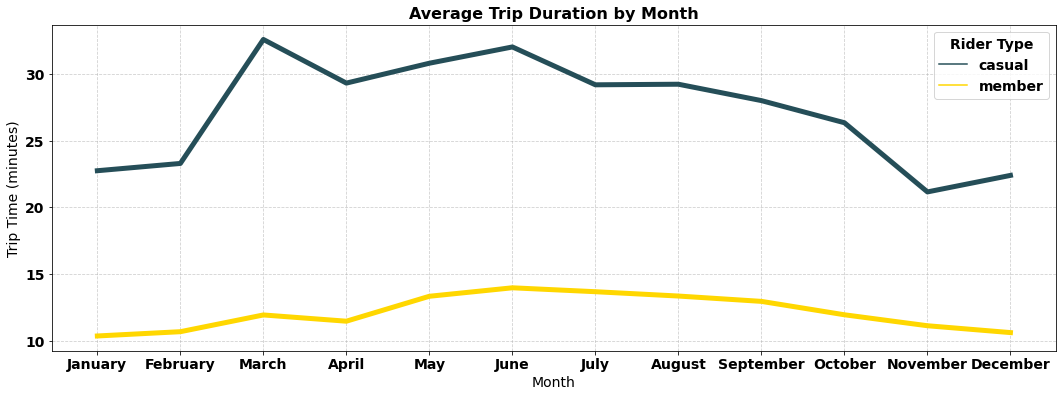

In [448]:
# Trip Time by month in rider group
# Line plot
plt.figure(figsize=(18, 6))
sns.lineplot(data=rider_month_trip_time, x='started_at', y='ride_length', hue = 'rider_type', 
            palette=custom_colors, linewidth=5, errorbar=None)
plt.xlabel('Month')
plt.ylabel('Trip Time (minutes)')
plt.legend(title='Rider Type')
plt.grid(linestyle='--', alpha=0.6)
plt.title('Average Trip Duration by Month', chart_style)
plt.show()

In [449]:
# Trip Time (in hours) by Start station name

start_station_trip_time = (cyclistic_df.groupby(['start_station_name'])
                           ['ride_length'].mean() / 60).reset_index()
#start_station_trip_time['days_trip_time'] = start_station_trip_time['days_trip_time'].astype(int)
start_station_trip_time

,start_station_name,ride_length
0,10101 S Stony Island Ave,21.777778
1,111th St - Morgan Park Metra,7.796429
2,2112 W Peterson Ave,18.683507
3,532 E 43rd St,16.011422
4,63rd & Western Ave - north corner,16.974183
...,...,...
1682,Yale Ave & 119th St,21.491667
1683,Yates Blvd & 75th St,38.223101
1684,Yates Blvd & 93rd St,321.233880
1685,Yates Blvd & Exchange Ave,17.064698


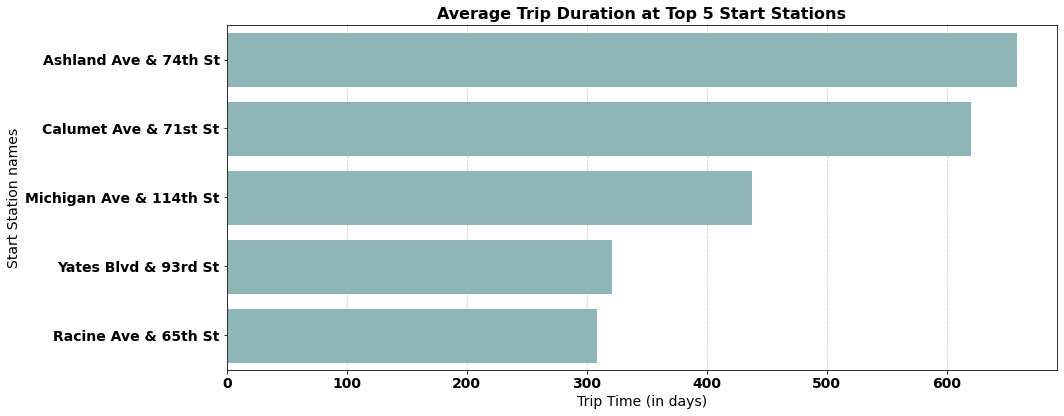

In [450]:
# Trip Time by Top 5 Start station name
# Bar Chart
top_5_start_stations = start_station_trip_time.nlargest(5, 'ride_length')

plt.figure(figsize=(15, 6))
sns.barplot(data=top_5_start_stations, x='ride_length', y='start_station_name',
            palette=custom_color, edgecolor='white', errorbar=None)
plt.xlabel('Trip Time (in days)')
plt.ylabel('Start Station names')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.title('Average Trip Duration at Top 5 Start Stations', chart_style)
plt.tight_layout()
plt.show()

In [451]:
# Trip Time in hours by Start station name in rider groups

rider_start_station_trip_time = (cyclistic_df.groupby(['start_station_name', 'rider_type'])
                           ['ride_length'].mean() / 60).reset_index()
rider_start_station_trip_time

,start_station_name,rider_type,ride_length
0,10101 S Stony Island Ave,casual,21.777778
1,111th St - Morgan Park Metra,casual,9.421429
2,111th St - Morgan Park Metra,member,6.171429
3,2112 W Peterson Ave,casual,31.390876
4,2112 W Peterson Ave,member,12.066255
...,...,...,...
3197,Yates Blvd & 93rd St,member,25.129630
3198,Yates Blvd & Exchange Ave,casual,16.799412
3199,Yates Blvd & Exchange Ave,member,17.213048
3200,Zapata Academy,casual,15.602778


In [452]:
# Top 5 trips by start station name in rider groups
largest_trips_by_member = rider_start_station_trip_time[rider_start_station_trip_time['rider_type'] == 
                                                        'member'].nlargest(5, 'ride_length')
largest_trips_by_casual = rider_start_station_trip_time[rider_start_station_trip_time['rider_type'] == 
                                                        'casual'].nlargest(5, 'ride_length')
largest_start_trip_time = pd.concat([largest_trips_by_member, largest_trips_by_casual])
#largest_start_trip_time['days_trip_time'] = largest_start_trip_time['ride_length'].astype(int)
largest_start_trip_time.sort_values(by=['rider_type', 'ride_length'], ascending=[True, False], inplace=True)
largest_start_trip_time

,start_station_name,rider_type,ride_length
88,Ashland Ave & 74th St,casual,1071.964286
308,Calumet Ave & 71st St,casual,1000.275969
3196,Yates Blvd & 93rd St,casual,637.412994
1505,Michigan Ave & 114th St,casual,540.603472
905,Halsted St & 96th St,casual,421.794318
2205,Public Rack - Langley Ave & Oakwood Blvd,member,192.433333
93,Ashland Ave & 78th St,member,164.695665
522,Clyde Ave & 87th St,member,99.084234
2830,State St & 123rd St,member,92.666667
710,Eggleston Ave & 115th St,member,84.841667


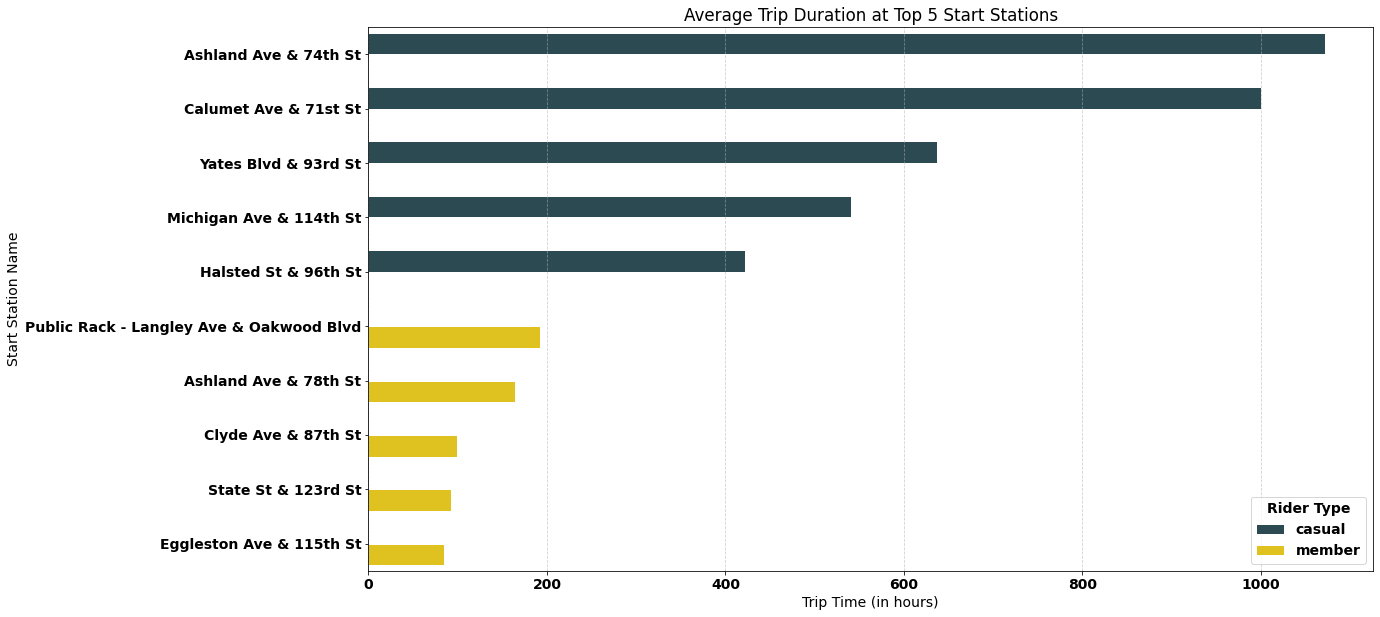

In [453]:
# Top 5 trips by Start station name in rider groups
# Bar Chart
plt.figure(figsize=(18, 10)) 
sns.barplot(data=largest_start_trip_time, x='ride_length', y='start_station_name', hue='rider_type',
            palette=custom_colors, edgecolor='white', errorbar=None)
plt.xlabel('Trip Time (in hours)')
plt.ylabel('Start Station Name')
plt.title('Average Trip Duration at Top 5 Start Stations')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend(title='Rider Type')
plt.show()

In [454]:
# Trip Time by End station name

end_station_trip_time = (cyclistic_df.groupby(['end_station_name'])['ride_length'].mean() / 1440).reset_index()
end_station_trip_time

,end_station_name,ride_length
0,10101 S Stony Island Ave,0.880990
1,111th St - Morgan Park Metra,0.305010
2,2112 W Peterson Ave,0.634701
3,532 E 43rd St,0.503800
4,63rd & Western Ave - north corner,0.742828
...,...,...
1709,Yale Ave & 119th St,0.705671
1710,Yates Blvd & 75th St,2.331467
1711,Yates Blvd & 93rd St,6.429932
1712,Yates Blvd & Exchange Ave,0.728275


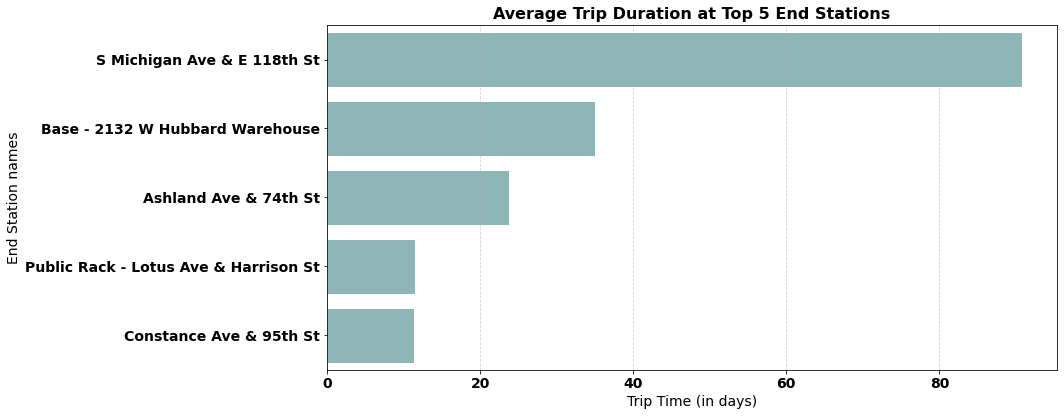

In [455]:
# Trip Time by Top 5 End station name
# Bar Chart
top_5_end_stations = end_station_trip_time.nlargest(5, 'ride_length')

plt.figure(figsize=(15, 6))
sns.barplot(data=top_5_end_stations, x='ride_length', y='end_station_name',
            palette=custom_color, edgecolor='white', errorbar=None)
plt.xlabel('Trip Time (in days)')
plt.ylabel('End Station names')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.title('Average Trip Duration at Top 5 End Stations', chart_style)
plt.tight_layout()
plt.show()

In [456]:
# Trip Time by End station name in rider groups

rider_end_station_trip_time = (cyclistic_df.groupby(['end_station_name', 
                                                      'rider_type'])['ride_length'].mean() / 1440).reset_index()
rider_end_station_trip_time

,end_station_name,rider_type,ride_length
0,10101 S Stony Island Ave,casual,0.910185
1,10101 S Stony Island Ave,member,0.793403
2,111th St - Morgan Park Metra,casual,0.328770
3,111th St - Morgan Park Metra,member,0.281250
4,2112 W Peterson Ave,casual,0.734634
...,...,...,...
3205,Yates Blvd & 93rd St,member,1.007695
3206,Yates Blvd & Exchange Ave,casual,0.492788
3207,Yates Blvd & Exchange Ave,member,0.832639
3208,Zapata Academy,casual,0.151389


In [457]:
# Top 5 trips by start station name in rider groups
largest_trips_by_member = rider_end_station_trip_time[rider_end_station_trip_time['rider_type'] == 
                                                        'member'].nlargest(5, 'ride_length')
largest_trips_by_casual = rider_end_station_trip_time[rider_end_station_trip_time['rider_type'] == 
                                                        'casual'].nlargest(5, 'ride_length')
largest_end_trip_time = pd.concat([largest_trips_by_member, largest_trips_by_casual])
largest_end_trip_time.sort_values(by=['rider_type', 'ride_length'], ascending=[True, False], inplace=True)
largest_end_trip_time

,end_station_name,rider_type,ride_length
172,Base - 2132 W Hubbard Warehouse,casual,129.715098
2677,S Michigan Ave & E 118th St,casual,124.585243
88,Ashland Ave & 74th St,casual,38.953478
541,Constance Ave & 95th St,casual,20.099871
700,East End Ave & 87th St,casual,17.991661
93,Ashland Ave & 78th St,member,5.570559
3067,West Chatham Park,member,5.538889
181,Bensley Ave & 103rd St,member,3.700694
1927,Public Rack - Commercial Ave & 89th St,member,3.271528
2725,Seeley Ave & Garfield Blvd,member,2.944792


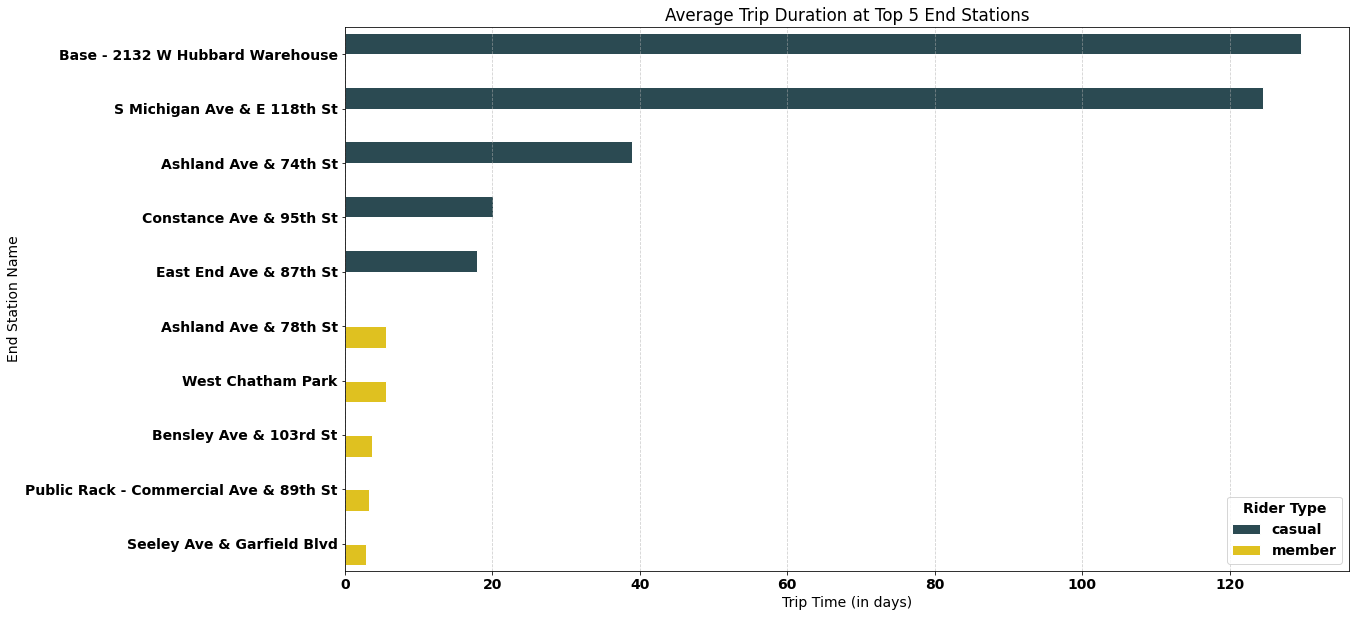

In [458]:
# Top 5 trips by End station name in rider groups
# Bar Chart
plt.figure(figsize=(18, 10)) 
sns.barplot(data=largest_end_trip_time, x='ride_length', y='end_station_name', hue='rider_type',
            palette=custom_colors, edgecolor='white', errorbar=None)
plt.xlabel('Trip Time (in days)')
plt.ylabel('End Station Name')
plt.title('Average Trip Duration at Top 5 End Stations')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend(title='Rider Type')
plt.show()

##### Routes

In [459]:
# Trip Time by Routes

stations_trip_time = (cyclistic_df.groupby(['start_station_name', 'end_station_name', 'rider_type'])
                     ['ride_length'].mean() / 60).reset_index()
stations_trip_time

,start_station_name,end_station_name,rider_type,ride_length
0,10101 S Stony Island Ave,Phillips Ave & 83rd St,casual,21.777778
1,111th St - Morgan Park Metra,111th St - Morgan Park Metra,casual,0.200000
2,111th St - Morgan Park Metra,Halsted St & 96th St,casual,5.266667
3,111th St - Morgan Park Metra,Halsted St & 96th St,member,4.691667
4,111th St - Morgan Park Metra,Homewood Ave & Monterey Ave,member,3.500000
...,...,...,...,...
318773,Zapata Academy,Komensky Ave & 31st St,member,8.533333
318774,Zapata Academy,Mayfield & Roosevelt Rd,casual,20.050000
318775,Zapata Academy,Pulaski Rd & 21st St,casual,12.116667
318776,Zapata Academy,State St & Pershing Rd,member,31.483333


In [460]:
# Trip Time by Routes in days
stations_trip_time['routes'] = stations_trip_time['start_station_name'] + ' to ' + stations_trip_time['end_station_name']
routes_trip_time = (stations_trip_time.groupby(['routes', 'rider_type'])['ride_length'].mean() / 1440).reset_index()
routes_trip_time

,routes,rider_type,ride_length
0,10101 S Stony Island Ave to Phillips Ave & 83r...,casual,0.015123
1,111th St - Morgan Park Metra to 111th St - Mor...,casual,0.000139
2,111th St - Morgan Park Metra to Halsted St & 9...,casual,0.003657
3,111th St - Morgan Park Metra to Halsted St & 9...,member,0.003258
4,111th St - Morgan Park Metra to Homewood Ave &...,member,0.002431
...,...,...,...
318773,Zapata Academy to Komensky Ave & 31st St,member,0.005926
318774,Zapata Academy to Mayfield & Roosevelt Rd,casual,0.013924
318775,Zapata Academy to Pulaski Rd & 21st St,casual,0.008414
318776,Zapata Academy to State St & Pershing Rd,member,0.021863


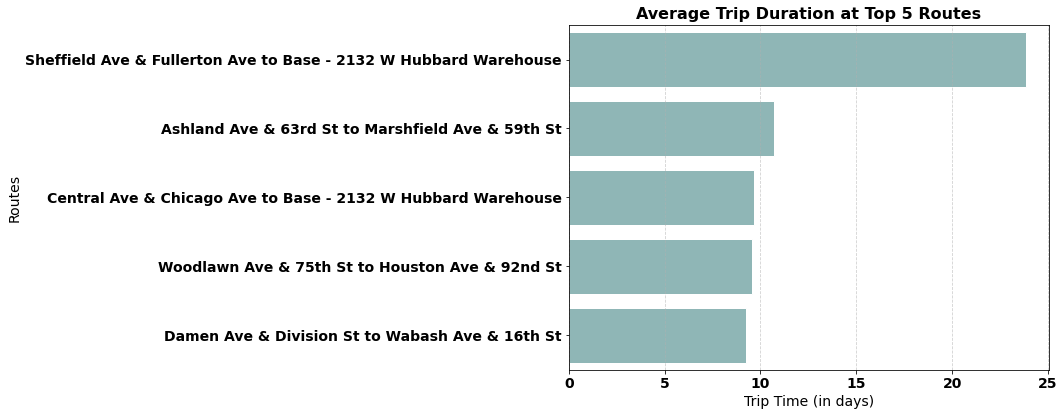

In [461]:
# Trip Time by Top 5 Routes
# Bar Chart
top_5_routes = routes_trip_time.nlargest(5, 'ride_length')

plt.figure(figsize=(15, 6))
sns.barplot(data=top_5_routes, x='ride_length', y='routes',
            palette=custom_color, edgecolor='white', errorbar=None)
plt.xlabel('Trip Time (in days)')
plt.ylabel('Routes')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.title('Average Trip Duration at Top 5 Routes', chart_style)
plt.tight_layout()
plt.show()

In [462]:
# Top 5 trips by Routes in rider groups
largest_route_time_by_member = routes_trip_time[routes_trip_time['rider_type'] == 
                                                        'member'].nlargest(5, 'ride_length')
largest_route_time_by_casual = routes_trip_time[routes_trip_time['rider_type'] == 
                                                        'casual'].nlargest(5, 'ride_length')
largest_rider_route_time = pd.concat([largest_route_time_by_member, largest_route_time_by_casual])
largest_rider_route_time.sort_values(by=['rider_type', 'ride_length'], ascending=[True, False], inplace=True)
largest_rider_route_time

,routes,rider_type,ride_length
251885,Sheffield Ave & Fullerton Ave to Base - 2132 W...,casual,23.856991
7009,Ashland Ave & 63rd St to Marshfield Ave & 59th St,casual,10.723200
44113,Central Ave & Chicago Ave to Base - 2132 W Hub...,casual,9.672373
318366,Woodlawn Ave & 75th St to Houston Ave & 92nd St,casual,9.557037
80808,Damen Ave & Division St to Wabash Ave & 16th St,casual,9.255174
16682,Bennett Ave & 79th St to Kimbark Ave & 53rd St,member,1.041620
44276,Central Ave & Lake St to Central Ave & Madison St,member,1.041620
179584,Marquette Ave & 89th St to Stony Island Ave & ...,member,1.041620
392,63rd St Beach to New St & Illinois St,member,1.041609
143234,Kedzie Ave & Roosevelt Rd to Damen Ave & Pierc...,member,1.041609


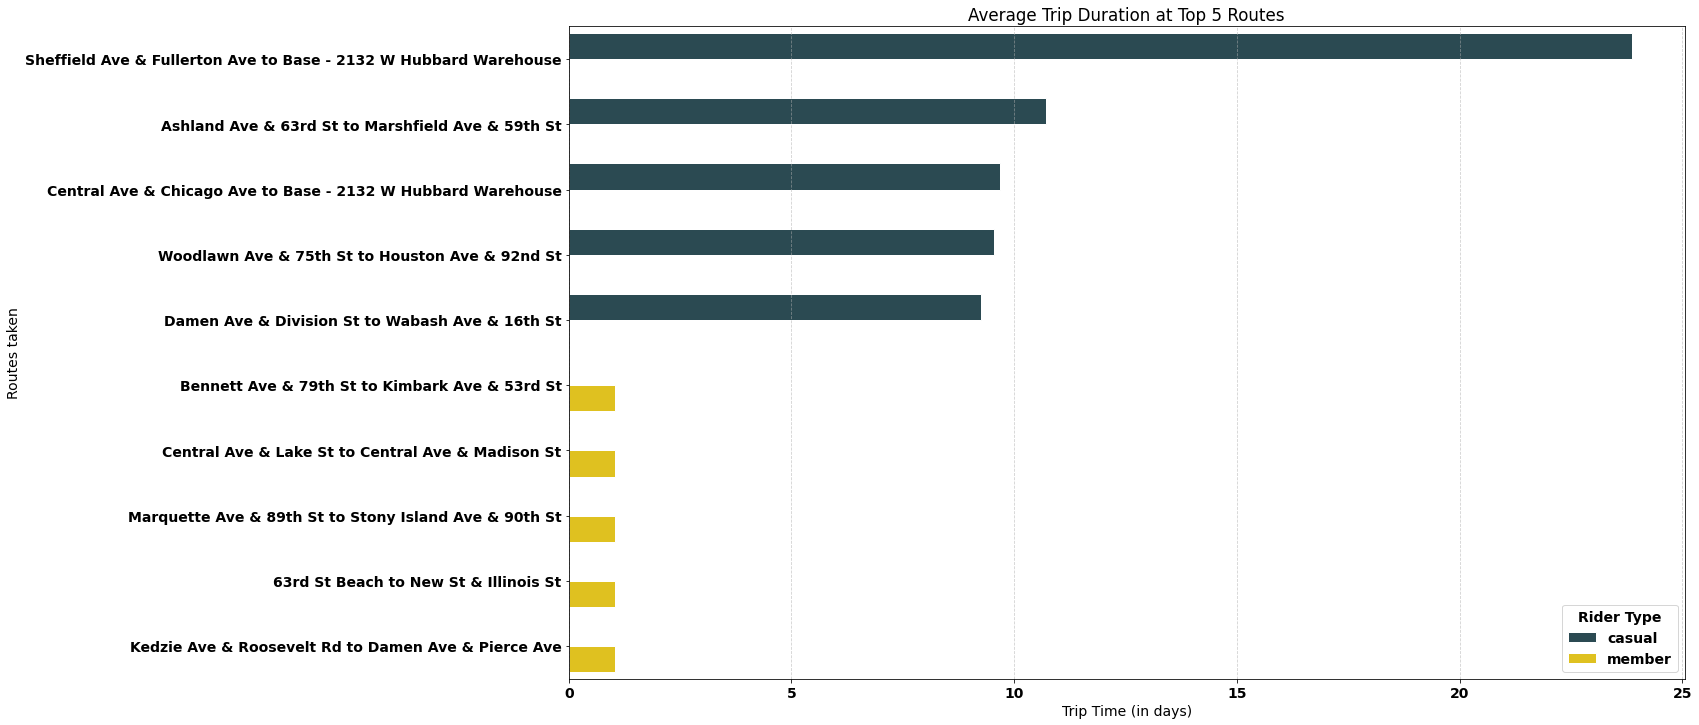

In [463]:
# Top 5 trips by Routes in rider groups
# Bar Chart
plt.figure(figsize=(20, 12)) 
sns.barplot(data=largest_rider_route_time, x='ride_length', y='routes', hue='rider_type',
            palette=custom_colors, edgecolor='white', errorbar=None)
plt.xlabel('Trip Time (in days)')
plt.ylabel('Routes taken')
plt.title('Average Trip Duration at Top 5 Routes')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend(title='Rider Type')
plt.show()

# SHARE PHASE

This analysis is described on **[my webpage](https://cyclistic-case-study.netlify.app/)**

# ACT PHASE

Recommendations to complete the ACT PHASE are stated on **[my webpage](https://cyclistic-case-study.netlify.app/)** and **[presentation slides](https://docs.google.com/presentation/d/1gqdaOkg2GCTGgHjUO278J75ZmHSDO5P9wk9KP48vUb4/edit?usp=drive_link)**

# Created by

#### Tobi Ibidapo-Obe

## Change Log

| Date (DD-MM-YYYY) | Version |        Name       |      Change Description                |
| ----------------- | ------- | ----------------- | -------------------------------------- |
| 16-03-2023        | 0.1     | Tobi Ibidapo-Obe  | Created initial version of the notebook|
| 26-09-2023        | 0.2     | Tobi Ibidapo-Obe  | Updated Notebook